# Data Science Project - Analysis of Airbnb Data

42577 Introduction to Business Analytics course - Group 13

Students: Andreas Ipsen (s174021) | Andro Kranjcevic (s204704) | Smári Steinn Ársælsson (s222554) | Bjarki Rúnar Sverrisson (s222547)

## Table of Contents
* [0. Introduction](#chapter3)
* [1.Data preparation and descriptive statistics](#chapter1)
    * [1.1 Columns with review values ](#section_1_1)
    * [1.2 Coulmns with price values](#section_1_1)
    * [1.3 columns with geographical values](#section_1_1)
* [2.Prediction challenge](#chapter2)
    * [2.1 Binary classification](#section_2_1)
    * [2.2 Multi class classification](#section_2_2)
* [3.Exploratory component](#chapter3)
    * [3.1 Stockholm data extension](#section_3_1)
    * [3.2 Price](#section_3_2)
    * [3.3 Clustering](#section_3_2)
    * [3.4 Classification](#section_3_2)
    * [3.5 Neural network](#section_3_2)
* [4. Conclusion](#chapter3)     

The project will focus on data analysis of rental pricing, and how it is influenced by geographical factors and feedback values for various periods of stay. The price range, alongside other information, is provided by rental broker company Airbnb. The aim is to predict whether the rental price is low, medium, or high according to the set threshold. Such a prediction should assist both, renters, and tenants with decision-making, therefore, creating value for both sides. Our findings should help customers select reliable, and affordable listing for their stay, and support the renters in their actions for increasing their profit.

We will then introduce the extended dataset of Airbnb rentals in Copenhagen, and Airbnb rentals from the Stockholm dataset. Also, the datasets from both cities will be pooled to generate better predictions.

### Table of work done
| Part/Person ||Andreas | Andro | Smári | Bjarki |
|------------||--------|-------|-------|--------|
| 0.      |Introduction|         |100%       |       |        |
| 1.      |Data preparation |         |50%       |       |        |
| 1.1      |Review data |         |100%       |       |        |
| 1.2      |Price data |         |       |       |100%        |
| 1.3 |Location data          | 100%    |       |       |        |
| 2.1      |  |         |       |       |        |
| 2.2      |Multi class classification  |         |100%       |       |        |
| 3.1 |Stockholm data extension        | 100%    |       |       |        |
| 3.2 |Price pr person        | 100%    |       |       |        |
| 3.3 |Clustering        | 100%    |       |       |        |
| 3.4      |  |         |       |       |        |
| 3.5      |Neural networks |         |100%       |       |        |
| 4.      |Conclusion |         |       |       |        |
|          |  |         |       |       |        |
|          |  |         |       |       |        |

# 1. Data preperation and descriptive statistics

Imorting the dataset and packages that will be used.

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import geopandas as gpd
import urllib
%matplotlib inline

In [149]:
data=pd.read_csv("listings_CPH.csv")

In [150]:
data.head()   #display first 5 rows

id                                               name  host_id  \
0   6983                               Copenhagen 'N Livin'    16774   
1  26057                Lovely house - most attractive area   109777   
2  26473          City Centre Townhouse Sleeps 1-10 persons   112210   
3  29118                    Best Location in Cool Istedgade   125230   
4  31094  Beautiful, spacious, central, renovated Penthouse   129976   

  host_name  neighbourhood_group              neighbourhood   latitude  \
0     Simon                  NaN                    Nrrebro  55.686410   
1      Kari                  NaN                   Indre By  55.693070   
2     Julia                  NaN                   Indre By  55.676020   
3      Nana                  NaN  Vesterbro-Kongens Enghave  55.670230   
4      Ebbe                  NaN  Vesterbro-Kongens Enghave  55.666602   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  12.547410  Entire home/apt    898               3                172   
1  12.576490  Entire home/apt   2600               4                 59   
2  12.575400  Entire home/apt   3250               3                300   
3  12.555040  Entire home/apt    725               7                 24   
4  12.555283  Entire home/apt   1954               3                 19   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2022-06-21               1.08                               1   
1  2022-08-09               0.55                               1   
2  2022-09-10               2.06                               3   
3  2022-08-04               0.16                               1   
4  2022-08-22               0.13                               1   

   availability_365  number_of_reviews_ltm  license  
0                 0                      4      NaN  
1               303                      8      NaN  
2                56                      7      NaN  
3                59                      2      NaN  
4                 0                      2      NaN

In [151]:
data.shape   #checking the length and shape of the dataset

(13815, 18)

In [152]:
data.dtypes      #overview of which data types the dataset consists of

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

It is visible that 'last_review' is an object, and not datetime object. Therefore, pandas to_datetime function is used to parse the column as DateTime.

In [153]:
data['last_review']=pd.to_datetime(data['last_review'],format='%Y-%m-%d')
data.dtypes 

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                  float64
dtype: object

We should also investigate the description of the numerical data.

In [154]:
data.describe().T

count          mean           std  \
id                              13815.0  1.719385e+17  2.852538e+17   
host_id                         13815.0  1.064145e+08  1.302801e+08   
neighbourhood_group                 0.0           NaN           NaN   
latitude                        13815.0  5.568057e+01  2.108847e-02   
longitude                       13815.0  1.255781e+01  3.351154e-02   
price                           13815.0  1.205879e+03  1.433143e+03   
minimum_nights                  13815.0  4.605574e+00  1.690015e+01   
number_of_reviews               13815.0  1.857112e+01  3.640267e+01   
reviews_per_month               12170.0  9.038159e-01  1.110754e+00   
calculated_host_listings_count  13815.0  4.400651e+00  2.129857e+01   
availability_365                13815.0  9.330264e+01  1.231620e+02   
number_of_reviews_ltm           13815.0  5.451104e+00  1.137398e+01   
license                             0.0           NaN           NaN   

                                        min           25%           50%  \
id                               6983.00000  1.907962e+07  3.931542e+07   
host_id                         11718.00000  1.356383e+07  4.656301e+07   
neighbourhood_group                     NaN           NaN           NaN   
latitude                           55.60951  5.566611e+01  5.568119e+01   
longitude                          12.43567  1.254029e+01  1.255552e+01   
price                               0.00000  7.290000e+02  9.950000e+02   
minimum_nights                      1.00000  2.000000e+00  3.000000e+00   
number_of_reviews                   0.00000  2.000000e+00  7.000000e+00   
reviews_per_month                   0.01000  2.300000e-01  5.300000e-01   
calculated_host_listings_count      1.00000  1.000000e+00  1.000000e+00   
availability_365                    0.00000  0.000000e+00  2.000000e+01   
number_of_reviews_ltm               0.00000  0.000000e+00  3.000000e+00   
license                                 NaN           NaN           NaN   

                                         75%           max  
id                              5.665348e+17  7.222925e+17  
host_id                         1.553486e+08  4.805803e+08  
neighbourhood_group                      NaN           NaN  
latitude                        5.569577e+01  5.574280e+01  
longitude                       1.258074e+01  1.265174e+01  
price                           1.368500e+03  6.490000e+04  
minimum_nights                  4.000000e+00  1.111000e+03  
number_of_reviews               2.000000e+01  7.110000e+02  
reviews_per_month               1.120000e+00  2.402000e+01  
calculated_host_listings_count  1.000000e+00  1.790000e+02  
availability_365                1.740000e+02  3.650000e+02  
number_of_reviews_ltm           6.000000e+00  4.710000e+02  
license                                  NaN           NaN

When comparing the mean to the median values across the different classes, it is visible that there is mostly a significant difference between them. It implies that we have a high amount of outliers, to which we should pay attention, in further analysis.

In [155]:
#drop non-desired columns
data=data.drop(columns=['neighbourhood_group','license','id','host_id','host_name','name'])    
data

neighbourhood   latitude  longitude        room_type  \
0                        Nrrebro  55.686410  12.547410  Entire home/apt   
1                       Indre By  55.693070  12.576490  Entire home/apt   
2                       Indre By  55.676020  12.575400  Entire home/apt   
3      Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt   
4      Vesterbro-Kongens Enghave  55.666602  12.555283  Entire home/apt   
...                          ...        ...        ...              ...   
13810                    sterbro  55.732840  12.572370  Entire home/apt   
13811                      Valby  55.667782  12.463285  Entire home/apt   
13812                      Valby  55.659536  12.474726  Entire home/apt   
13813               Brnshj-Husum  55.730971  12.487993  Entire home/apt   
13814                 Bispebjerg  55.731420  12.521770     Private room   

       price  minimum_nights  number_of_reviews last_review  \
0        898               3                172  2022-06-21   
1       2600               4                 59  2022-08-09   
2       3250               3                300  2022-09-10   
3        725               7                 24  2022-08-04   
4       1954               3                 19  2022-08-22   
...      ...             ...                ...         ...   
13810   1250              14                  0         NaT   
13811    450               3                  3  2022-07-21   
13812    400               1                  3  2022-08-14   
13813    850               1                  0         NaT   
13814    420               2                  1  2022-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   1.08                               1                 0   
1                   0.55                               1               303   
2                   2.06                               3                56   
3                   0.16                               1                59   
4                   0.13                               1                 0   
...                  ...                             ...               ...   
13810                NaN                               1                 0   
13811               1.01                               1                 0   
13812               1.27                               1                 0   
13813                NaN                               1                 0   
13814               0.37                               2                 0   

       number_of_reviews_ltm  
0                          4  
1                          8  
2                          7  
3                          2  
4                          2  
...                      ...  
13810                      0  
13811                      3  
13812                      3  
13813                      0  
13814                      1  

[13815 rows x 12 columns]

In [156]:
#remove data with avalability as 0
data=data[data['availability_365']!=0]   #drop rows containing 0 in the 'availability_365' column
data['reviews_per_month']=data['reviews_per_month'].fillna(0) #Set n/a = 0 for reviews_per_month. 

C:\Users\Lado\AppData\Local\Temp/ipykernel_10908/2120009902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews_per_month']=data['reviews_per_month'].fillna(0) #Set n/a = 0 for reviews_per_month.


# 1.1 Columns with review values

The selected columns are containing review values, describing the amount, monthly occurrence, and date of the reviews. The aim here is to sort the data in a way, that contains only the properties with feedback (review), and with the most recent reviews (<1 year), which are not outdated. 

In [78]:
#drop NaN in selected columns, which doesn't contain any review value
data_review=data.dropna(subset=['number_of_reviews','last_review','reviews_per_month','number_of_reviews_ltm'])  

In [79]:
data_review.head()

neighbourhood   latitude  longitude        room_type  price  \
1                   Indre By  55.693070  12.576490  Entire home/apt   2600   
2                   Indre By  55.676020  12.575400  Entire home/apt   3250   
3  Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt    725   
5  Vesterbro-Kongens Enghave  55.672638  12.552493  Entire home/apt   1280   
6                    sterbro  55.711760  12.570910  Entire home/apt    617   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
1               4                 59  2022-08-09               0.55   
2               3                300  2022-09-10               2.06   
3               7                 24  2022-08-04               0.16   
5               3                 80  2022-08-13               0.54   
6             100                  7  2016-09-15               0.05   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
1                               1               303                      8  
2                               3                56                      7  
3                               1                59                      2  
5                               2                60                      5  
6                               1               281                      0

To have a better overview of the columns containing review values, they will be sorted in a smaller version of our dataframe. 

In [80]:
ae=data_review[['number_of_reviews', 'last_review', 'reviews_per_month', 'number_of_reviews_ltm']]
ae

number_of_reviews last_review  reviews_per_month  number_of_reviews_ltm
1                     59  2022-08-09               0.55                      8
2                    300  2022-09-10               2.06                      7
3                     24  2022-08-04               0.16                      2
5                     80  2022-08-13               0.54                      5
6                      7  2016-09-15               0.05                      0
...                  ...         ...                ...                    ...
13780                 29  2022-07-18               0.55                      3
13782                 20  2022-09-10               0.44                     13
13786                  6  2021-07-10               0.16                      0
13790                  4  2022-08-08               0.12                      1
13795                  9  2022-09-17               0.64                      7

[7851 rows x 4 columns]

Rows containing 0 reviews, and having no reviews in last 12 months ('number_of_reviews_ltm') aren't considered in review data analysis.

In [81]:
data_review=data_review[data_review['number_of_reviews_ltm']!=0].dropna()   #drop review rows containing 0 []
data_review

neighbourhood   latitude  longitude        room_type  \
1                       Indre By  55.693070  12.576490  Entire home/apt   
2                       Indre By  55.676020  12.575400  Entire home/apt   
3      Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt   
5      Vesterbro-Kongens Enghave  55.672638  12.552493  Entire home/apt   
9                       Indre By  55.684288  12.573019  Entire home/apt   
...                          ...        ...        ...              ...   
13778               Brnshj-Husum  55.720460  12.443340  Entire home/apt   
13780               Brnshj-Husum  55.722940  12.446230  Entire home/apt   
13782                  Amager st  55.639400  12.643140  Entire home/apt   
13790                 Bispebjerg  55.721400  12.512040  Entire home/apt   
13795                    sterbro  55.733520  12.579200  Entire home/apt   

       price  minimum_nights  number_of_reviews last_review  \
1       2600               4                 59  2022-08-09   
2       3250               3                300  2022-09-10   
3        725               7                 24  2022-08-04   
5       1280               3                 80  2022-08-13   
9       1900              14                 15  2022-09-17   
...      ...             ...                ...         ...   
13778    300               4                 18  2022-08-04   
13780    650               1                 29  2022-07-18   
13782    989               4                 20  2022-09-10   
13790   1000               5                  4  2022-08-08   
13795    429              14                  9  2022-09-17   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1                   0.55                               1               303   
2                   2.06                               3                56   
3                   0.16                               1                59   
5                   0.54                               2                60   
9                   0.10                               1                87   
...                  ...                             ...               ...   
13778               0.24                               1                 1   
13780               0.55                               1                 1   
13782               0.44                               3                 2   
13790               0.12                               1                 5   
13795               0.64                               4                 3   

       number_of_reviews_ltm  
1                          8  
2                          7  
3                          2  
5                          5  
9                          6  
...                      ...  
13778                      2  
13780                      3  
13782                     13  
13790                      1  
13795                      7  

[6966 rows x 12 columns]

The next step is to visualize the relevant columns with  review values, for the outliers detection, and further investigation.

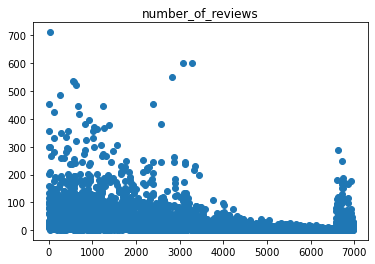

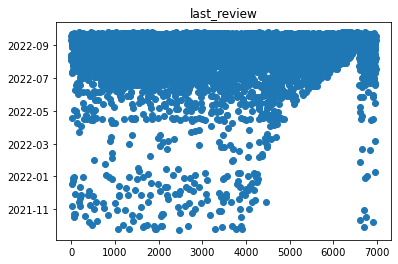

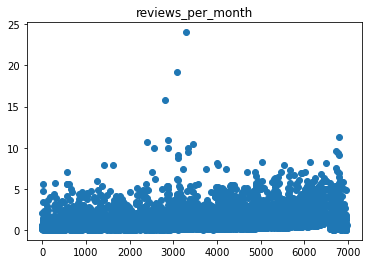

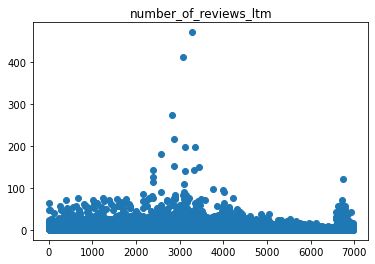

In [82]:
data_col=['number_of_reviews', 'last_review', 'reviews_per_month','number_of_reviews_ltm']
for i in range(len(data_col)):
    plt.scatter(range(0,len(data_review[data_col[i]])),data_review[data_col[i]])
    plt.title(data_col[i])
    plt.show()

As expected, all the plots above have similar distribution, and outlier position. We're most interested in the last plot, as it does not contain outdated reviews.  


In this case, outliers will be considered the points with value higher than 150. 

In [83]:
data_review.loc[data_review["number_of_reviews_ltm"] > 150]   #display only the rows with more than 500 reviews

neighbourhood  latitude  longitude        room_type  price  \
5810                   Indre By  55.68185   12.57592  Entire home/apt   3031   
6476                 Bispebjerg  55.70322   12.53800      Shared room    198   
6618  Vesterbro-Kongens Enghave  55.67091   12.56357  Entire home/apt   1461   
6619  Vesterbro-Kongens Enghave  55.67091   12.56357  Entire home/apt   2099   
7099                   Indre By  55.68213   12.57523  Entire home/apt   1529   
7181                  Amager st  55.66522   12.61890     Private room    662   
7570  Vesterbro-Kongens Enghave  55.67167   12.54656     Private room    721   
7690  Vesterbro-Kongens Enghave  55.67188   12.55802      Shared room    411   

      minimum_nights  number_of_reviews last_review  reviews_per_month  \
5810               1                383  2022-09-21               9.99   
6476               1                550  2022-09-09              15.74   
6618               1                246  2022-09-14              10.03   
6619               1                263  2022-09-18              10.90   
7099               1                602  2022-09-22              19.23   
7181               1                246  2022-09-20               8.71   
7570               1                599  2022-09-07              24.02   
7690               1                230  2022-09-20               9.48   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
5810                               4               365                    182  
6476                               1               364                    275  
6618                               3               349                    154  
6619                               3               358                    216  
7099                               6               364                    411  
7181                               1               365                    198  
7570                               3               362                    471  
7690                               1               297                    197

It is visible from the plot above that all the stayings considered as an outliers were of very short duration ('minimum_nights'==1). Because of that, much more customers went through the property, and therefore amount of provided reviews was significantly higher compared to the rest of the stayings. However, it this situation, the properties considered as outliers can rely more on the customer feedback than others.




# 1.2 Columns with price values

In [174]:
data.T

1                    2      \
neighbourhood                              Indre By             Indre By   
latitude                                   55.69307             55.67602   
longitude                                  12.57649              12.5754   
room_type                           Entire home/apt      Entire home/apt   
price                                          2600                 3250   
minimum_nights                                    4                    3   
number_of_reviews                                59                  300   
last_review                     2022-08-09 00:00:00  2022-09-10 00:00:00   
reviews_per_month                              0.55                 2.06   
calculated_host_listings_count                    1                    3   
availability_365                                303                   56   
number_of_reviews_ltm                             8                    7   

                                                    3      \
neighbourhood                   Vesterbro-Kongens Enghave   
latitude                                         55.67023   
longitude                                        12.55504   
room_type                                 Entire home/apt   
price                                                 725   
minimum_nights                                          7   
number_of_reviews                                      24   
last_review                           2022-08-04 00:00:00   
reviews_per_month                                    0.16   
calculated_host_listings_count                          1   
availability_365                                       59   
number_of_reviews_ltm                                   2   

                                                    5      \
neighbourhood                   Vesterbro-Kongens Enghave   
latitude                                        55.672638   
longitude                                       12.552493   
room_type                                 Entire home/apt   
price                                                1280   
minimum_nights                                          3   
number_of_reviews                                      80   
last_review                           2022-08-13 00:00:00   
reviews_per_month                                    0.54   
calculated_host_listings_count                          2   
availability_365                                       60   
number_of_reviews_ltm                                   5   

                                              6      \
neighbourhood                               sterbro   
latitude                                   55.71176   
longitude                                  12.57091   
room_type                           Entire home/apt   
price                                           617   
minimum_nights                                  100   
number_of_reviews                                 7   
last_review                     2016-09-15 00:00:00   
reviews_per_month                              0.05   
calculated_host_listings_count                    1   
availability_365                                281   
number_of_reviews_ltm                             0   

                                                    7      \
neighbourhood                   Vesterbro-Kongens Enghave   
latitude                                         55.66631   
longitude                                        12.54555   
room_type                                 Entire home/apt   
price                                                1000   
minimum_nights                                          6   
number_of_reviews                                      71   
last_review                           2019-03-14 00:00:00   
reviews_per_month                                    0.48   
calculated_host_listings_count                          1   
availability_365                                      312   
number_of_reviews_ltm

In [175]:
price_median = np.median(data["price"])
print(price_median)

1004.0


Graphs

<AxesSubplot:xlabel='neighbourhood'>

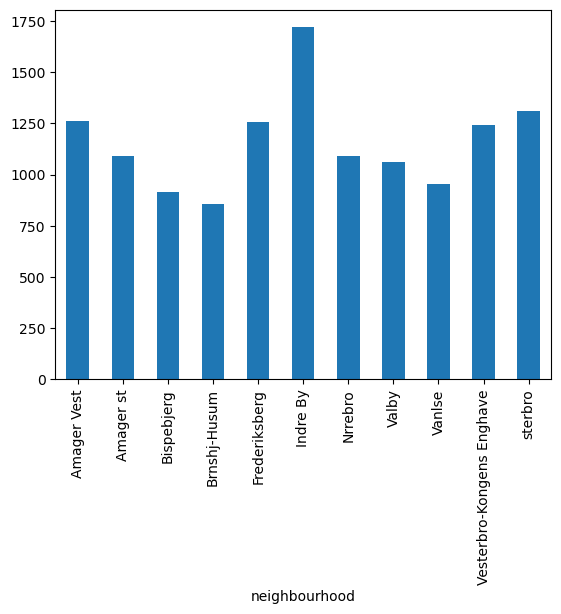

In [176]:
data.groupby("neighbourhood")["price"].mean().plot(kind="bar")

<AxesSubplot:xlabel='neighbourhood'>

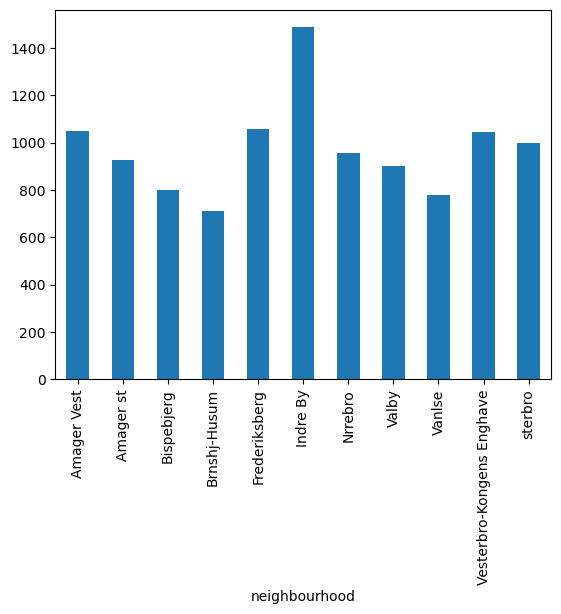

In [177]:
data.groupby("neighbourhood")["price"].median().plot(kind="bar")

<AxesSubplot:xlabel='room_type'>

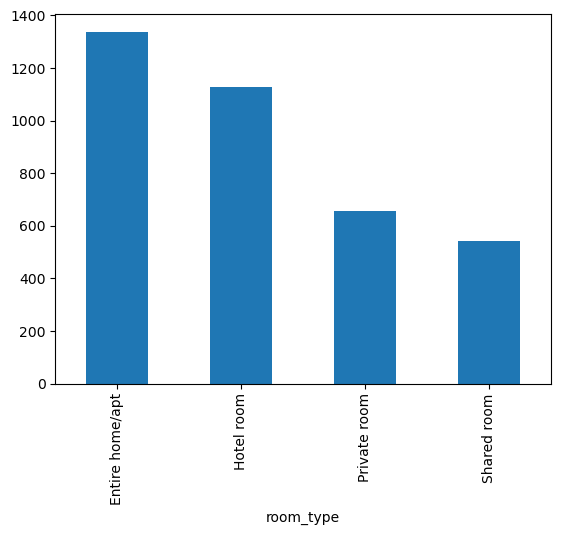

In [178]:
data.groupby("room_type")["price"].mean().plot(kind="bar")

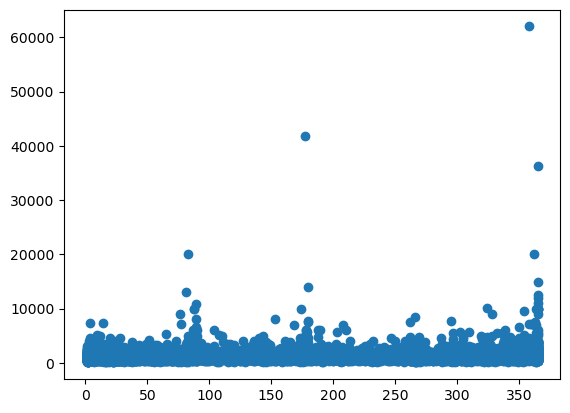

In [179]:
plt.scatter(data.availability_365,data.price)

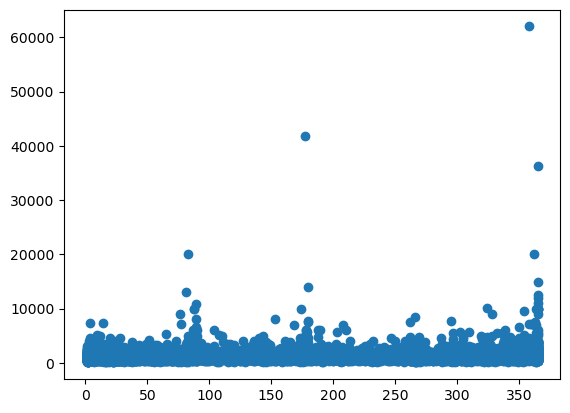

In [180]:
plt.scatter(data.availability_365,data.price)

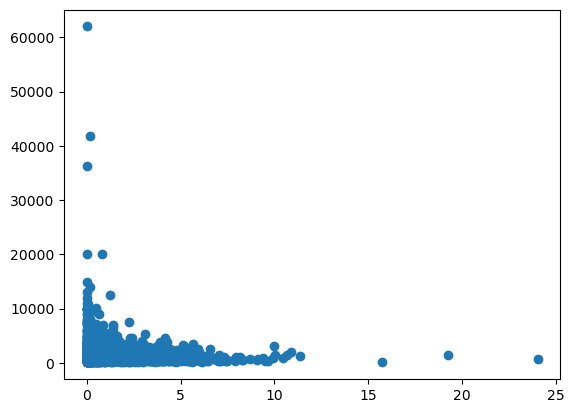

In [181]:
plt.scatter(data.reviews_per_month,data.price)

So we have 6 outliers that have way higher price than the rest. Lest try to take them out and plot these same 3 graphs again

In [182]:
dataset = data[data["price"]<30000]

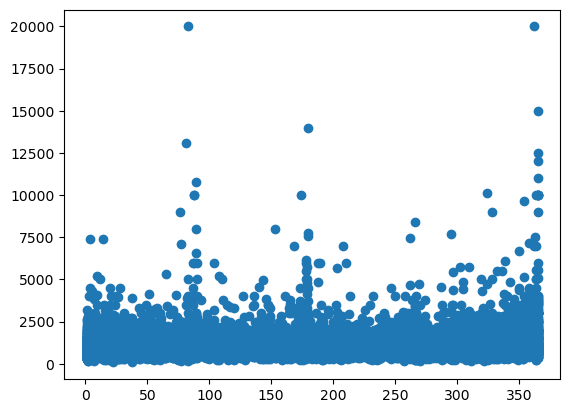

In [183]:
plt.scatter(dataset.availability_365,dataset.price)

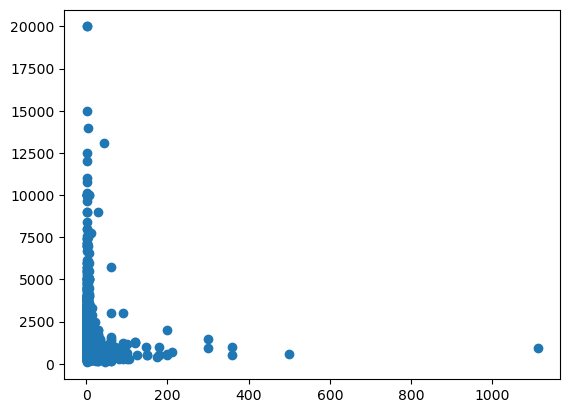

In [184]:
plt.scatter(dataset.minimum_nights,dataset.price)

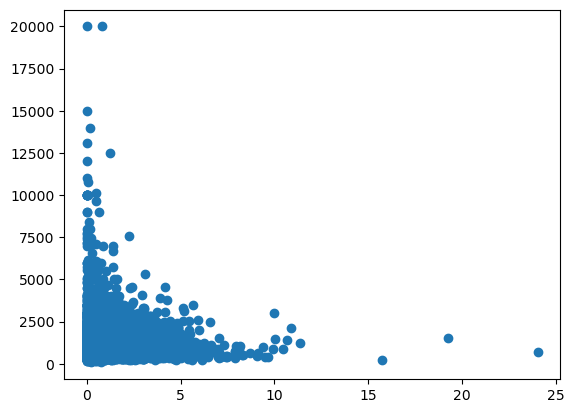

In [185]:
plt.scatter(dataset.reviews_per_month,dataset.price)

# 1.3 Columns with geographical values

Before visualizing the locations, it can be useful to get an overview of the neighborhood variable

In [186]:
#Find number of neighboorhoods in list
num_neighbourhoods=len(set(data.neighbourhood))
print(num_neighbourhoods)
print(set(data.neighbourhood))

11
{'Indre By', 'Valby', 'Amager st', 'Bispebjerg', 'Vanlse', 'Frederiksberg', 'Vesterbro-Kongens Enghave', 'Brnshj-Husum', 'Amager Vest', 'Nrrebro', 'sterbro'}


For better visualization, each neighborhood can be colored differently. 

In [187]:
colors = [float(hash(s) % 11) / 11 for s in data.neighbourhood] 
#Num should be 256 in theory. But 255 gives better color separation

Spatial data about Copenhagen can be gathered from https://www.opendata.dk/. By modifying a dataset showing air pollution, we can use Geopandas to generate a map of all the roads in Copenhagen. This can help visaulization of AirBnb locations. 

In [188]:
url = "https://kkkortdata.spatialsuite.dk/airview/CAV_25May2021.geojson" #Data location
remote_data = urllib.request.urlopen(url) #Get data
map_data = gpd.read_file(remote_data) #Define variable
map_data.head()

FID  Shape_Leng  ROAD_FID  Mixed_NO2  Mixed_UFP  Mixed_BC  \
0    0   58.821698         1    -999999    -999999 -999999.0   
1    1   31.898519         2         10      18500       0.8   
2    2   36.276259         3          9      12800       0.8   
3    3   40.416066         4          9      10700       0.7   
4    4   32.734397         5         13      14500       1.1   

                                            geometry  
0  LINESTRING (12.57828 55.69392, 12.57752 55.69423)  
1  LINESTRING (12.62463 55.63461, 12.62473 55.63433)  
2  LINESTRING (12.58604 55.60184, 12.58595 55.602...  
3  LINESTRING (12.58629 55.59317, 12.58569 55.59305)  
4  LINESTRING (12.58135 55.59200, 12.58130 55.59171)

In [189]:
map_data.Mixed_BC=0 #Set data column equal to 0 for visulization in 1 color only. 

<Figure size 500x500 with 0 Axes>

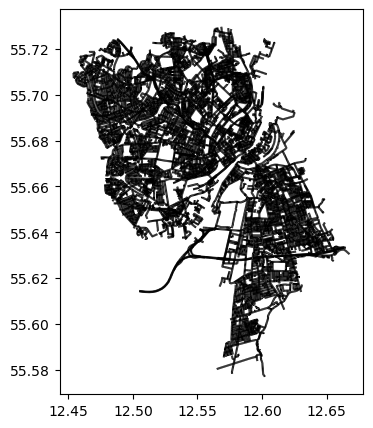

In [190]:
plt.figure(figsize=(5,5))
map_data.plot(column="Mixed_BC", cmap="gray",figsize=(5,5))
plt.show()


The colored neighborhood data can now be plotted together with a map of the roads of Copenhagen. 

<Figure size 1500x1500 with 0 Axes>

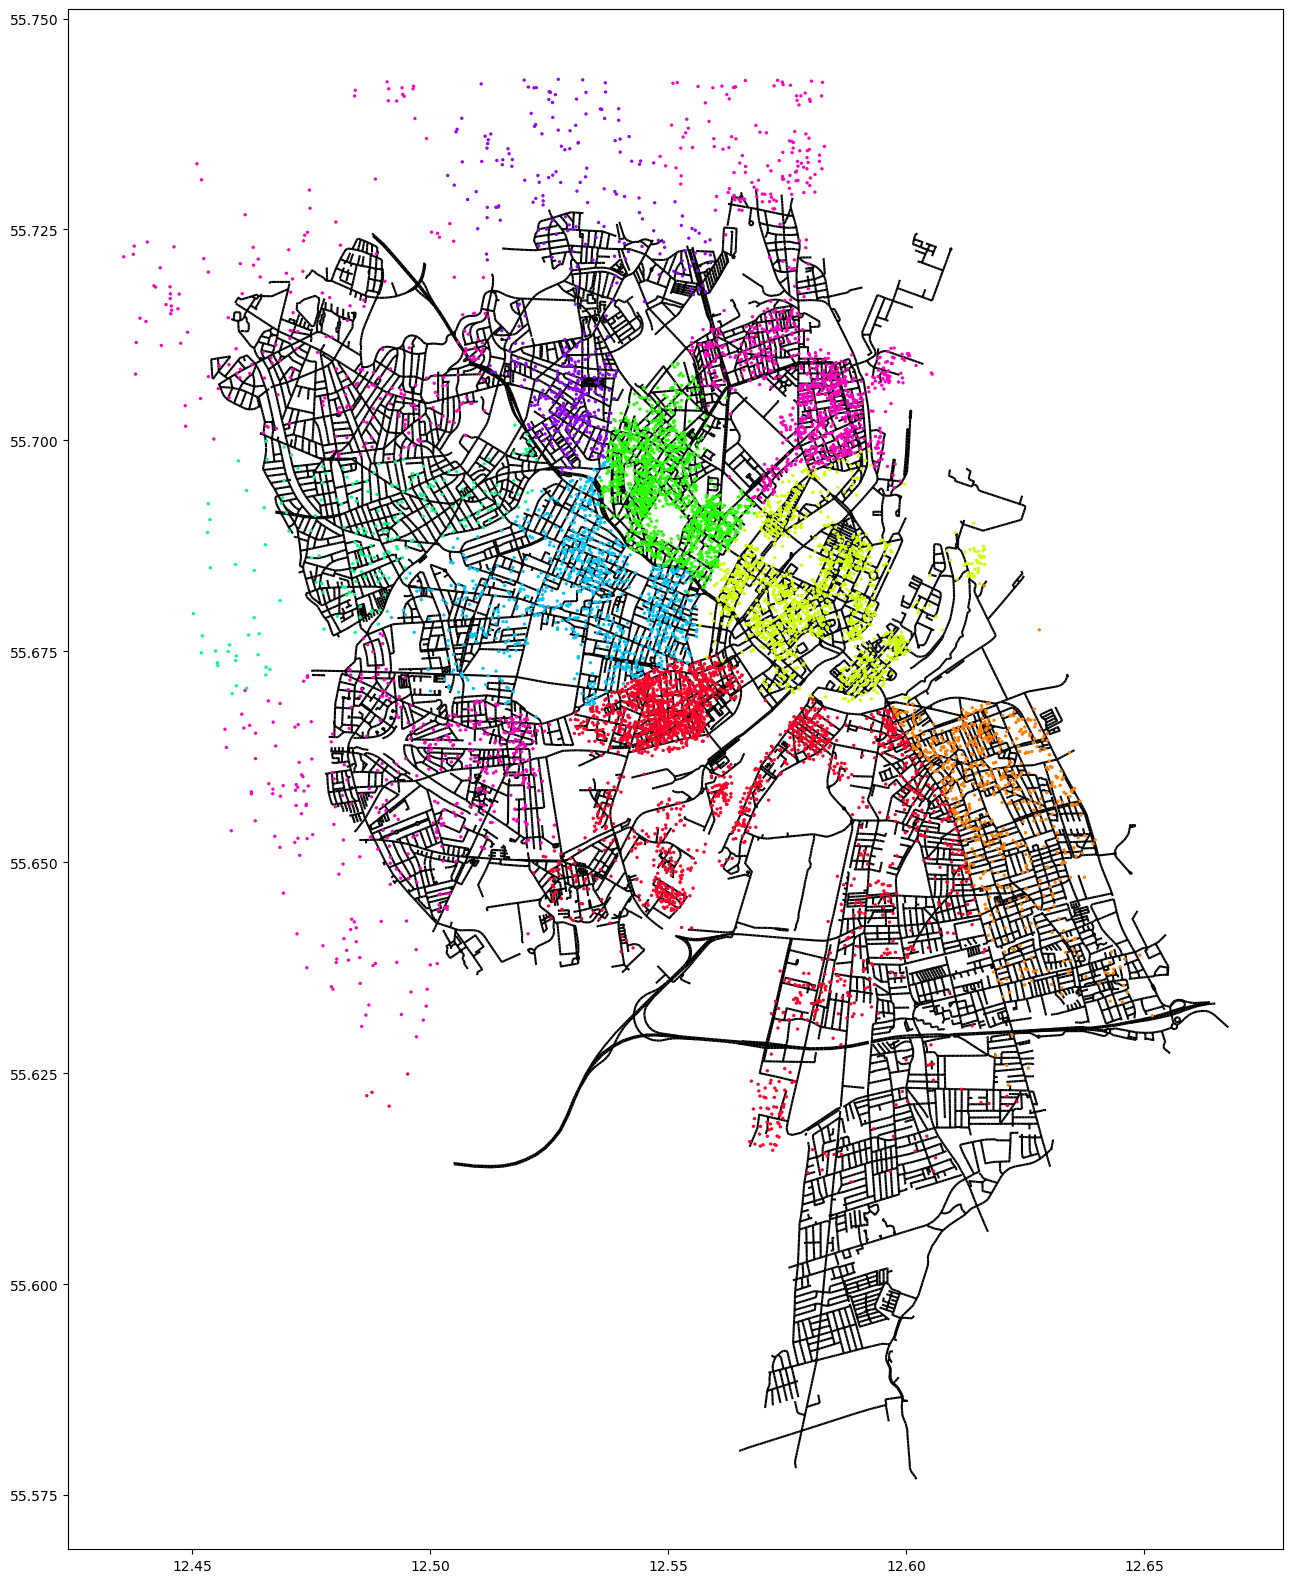

In [194]:
plt.figure(figsize=(15,15))

map_data.plot(column="Mixed_BC",zorder=0,cmap="gray",figsize=(20,20)) #Road Plot
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10) #AirBnB Locations 
#zorder used to place points on top of roads. 
plt.show();

The AirBnb Project provides geojson files which defines the areas of the Neighborhood. The outlines of these can be added to the map as well. 

<AxesSubplot:>

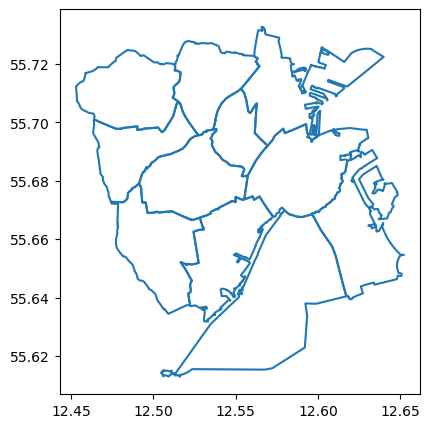

In [195]:
theHoods=gpd.read_file('neighbourhoods.geojson')
theHoods.boundary.plot(figsize=(5,5)) #Plot boundaries

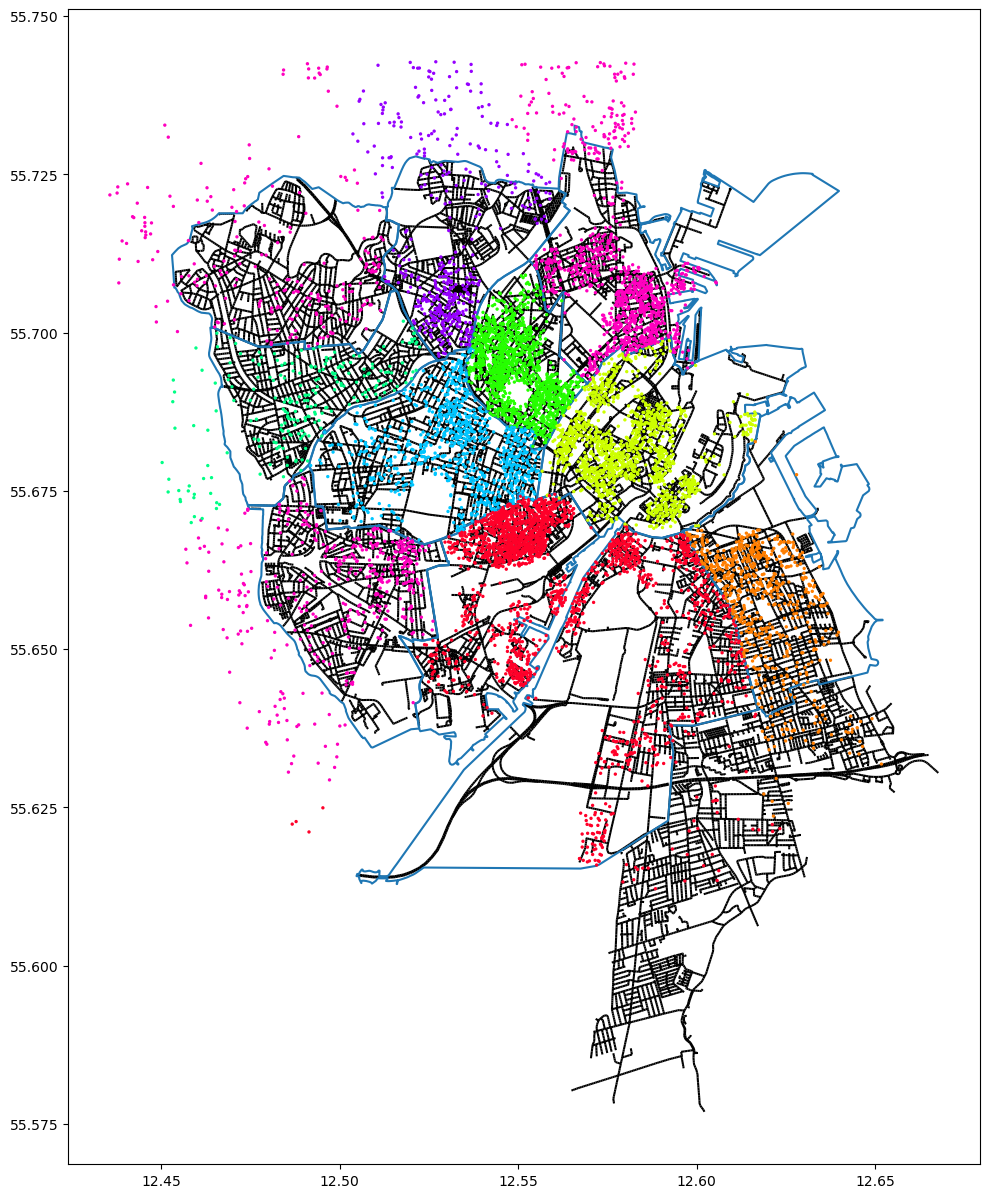

In [193]:
fig, ax = plt.subplots(figsize=(15,15)) #Has to be treated as a subplots. See geopandas documentation. 
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15)) #Neighborhood borders
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray") #Road map
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10) #Locations

plt.show();

# 2. Prediction challenge

The second part of the notebook is about predicting whether the price of a rental is low or high, for binary classification, and whether the price of a rental is medium, low, or high, for multi class classification.

# 2.1 Binary classification

We want to predict weather the price is low so we start by defining what is a low price
We decide that a low price is a price that is lower than the median price of housing

In [106]:
#define a low price threshold
#we will use the median price as the threshold for low price
low_price_threshold = data['price'].median()
#this means low price is lower than the median price

We want to see how many listings are more expensive and how many listings are less expensive than the low price threshold

In [35]:
#check how many listings are below the threshold
low_price = data[data['price'] < low_price_threshold]
print('There are {} listings below the threshold'.format(len(low_price)))
#check how many listings are above the threshold
high_price = data[data['price'] > low_price_threshold]
print('There are {} listings above the threshold'.format(len(high_price)))

There are 6899 listings below the threshold
There are 6845 listings above the threshold


We see that the dataset is pretty evenly split. 
Now we want to predict weather the price will be low or high

In [36]:
#prepare the dataset for classification
#we will use the price as the target variable

#Start by creating a new column called 'low_price', assign 1 to the low price and 0 to the high price
data['low_price'] = np.where(data['price'] < low_price_threshold, 1, 0)

Now we can create the linear regression model

In [37]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=100000)

Now we have a empty model.
Start by creating a test set with (2/3) of the data and training set with the remaining (1/3)

In [38]:
#create the training and testing sets
#we will use 2/3 of the data for training and 1/3 for testing
split = int(len(data)*2/3)
train = data[:split]
test = data[split:]

Now we want to make dummy variables for the group variables, that allow us to have a single regression equation on multiple groups

In [39]:
data.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'low_price'],
      dtype='object')

In [40]:
#make dummy variables for neighbourhood and room type
train = pd.get_dummies(train, columns=['neighbourhood', 'room_type'])
test = pd.get_dummies(test, columns=['neighbourhood', 'room_type'])


Now we want to pick the x and y for the sets.
Y is the stress variable in this case and x are all columns we think will help the prediction.
Start by taking a look at the other columns

In [41]:
train.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'low_price',
       'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

Now we want to see what kind of data is in each column

In [42]:
test.head().T

9210  \
latitude                                            55.66696   
longitude                                           12.55495   
price                                                   1211   
minimum_nights                                             3   
number_of_reviews                                         16   
last_review                              2022-09-20 00:00:00   
reviews_per_month                                       1.46   
calculated_host_listings_count                             1   
availability_365                                          49   
number_of_reviews_ltm                                     16   
low_price                                                  0   
neighbourhood_Amager Vest                                  0   
neighbourhood_Amager st                                    0   
neighbourhood_Bispebjerg                                   0   
neighbourhood_Brnshj-Husum                                 0   
neighbourhood_Frederiksberg                                0   
neighbourhood_Indre By                                     0   
neighbourhood_Nrrebro                                      0   
neighbourhood_Valby                                        0   
neighbourhood_Vanlse                                       0   
neighbourhood_Vesterbro-Kongens Enghave                    1   
neighbourhood_sterbro                                      0   
room_type_Entire home/apt                                  1   
room_type_Hotel room                                       0   
room_type_Private room                                     0   
room_type_Shared room                                      0   

                                                        9211  \
latitude                                            55.71192   
longitude                                           12.57518   
price                                                    479   
minimum_nights                                             4   
number_of_reviews                                         14   
last_review                              2022-09-07 00:00:00   
reviews_per_month                                       3.75   
calculated_host_listings_count                             1   
availability_365                                          58   
number_of_reviews_ltm                                     14   
low_price                                                  1   
neighbourhood_Amager Vest                                  0   
neighbourhood_Amager st                                    0   
neighbourhood_Bispebjerg                                   0   
neighbourhood_Brnshj-Husum                                 0   
neighbourhood_Frederiksberg                                0   
neighbourhood_Indre By                                     0   
neighbourhood_Nrrebro                                      0   
neighbourhood_Valby                                        0   
neighbourhood_Vanlse                                       0   
neighbourhood_Vesterbro-Kongens Enghave                    0   
neighbourhood_sterbro                                      1   
room_type_Entire home/apt                                  0   
room_type_Hotel room                                       0   
room_type_Private room                                     1   
room_type_Shared room                                      0   

                                                        9212  \
latitude                                            55.66799   
longitude                                           12.61674   
price                                                    650   
minimum_nights                                             4   
number_of_reviews                                          9   
last_review                              2022-09-03 00:00:00   
reviews_per_month                                       1.44   
calculated_host_listings_count                             1   
availability_365      

Now we make the x train and test sets with useful predictors.
Y train and test set with our target variable.

In [87]:
#create a list of features we intend to use
base_list = ['minimum_nights', 'reviews_per_month', 'calculated_host_listings_count',
        'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room']

x_train = train[base_list]
x_test = test[base_list]

y_train = train['low_price']
y_test = test['low_price']

Check what data is in our train variables 

In [88]:
x_train[:5].T

1     2     3     5       6
minimum_nights                           4.00  3.00  7.00  3.00  100.00
reviews_per_month                        0.55  2.06  0.16  0.54    0.05
calculated_host_listings_count           1.00  3.00  1.00  2.00    1.00
neighbourhood_Amager Vest                0.00  0.00  0.00  0.00    0.00
neighbourhood_Amager st                  0.00  0.00  0.00  0.00    0.00
neighbourhood_Bispebjerg                 0.00  0.00  0.00  0.00    0.00
neighbourhood_Brnshj-Husum               0.00  0.00  0.00  0.00    0.00
neighbourhood_Frederiksberg              0.00  0.00  0.00  0.00    0.00
neighbourhood_Indre By                   1.00  1.00  0.00  0.00    0.00
neighbourhood_Nrrebro                    0.00  0.00  0.00  0.00    0.00
neighbourhood_Valby                      0.00  0.00  0.00  0.00    0.00
neighbourhood_Vanlse                     0.00  0.00  0.00  0.00    0.00
neighbourhood_Vesterbro-Kongens Enghave  0.00  0.00  1.00  1.00    0.00
neighbourhood_sterbro                    0.00  0.00  0.00  0.00    1.00
room_type_Entire home/apt                1.00  1.00  1.00  1.00    1.00
room_type_Hotel room                     0.00  0.00  0.00  0.00    0.00
room_type_Private room                   0.00  0.00  0.00  0.00    0.00

Now it is time to use logistic regression to train the model

In [89]:
#use logistic regression to train the model
LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

Now we want to see how our model did.
Start by looking at the accuracy

In [90]:
print(LogReg.score(x_test, y_test))
print(LogReg.score(x_train, y_train))

0.6461538461538462
0.6659976584713163


Since the training score is higher than the testing score, we can conclude that the model is overfitting. Next we want to take a look at the confusion matrix.

In [91]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = LogReg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 866  582]
 [ 476 1066]]


Now this matrix is not very clear, lets make a more graphical version

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


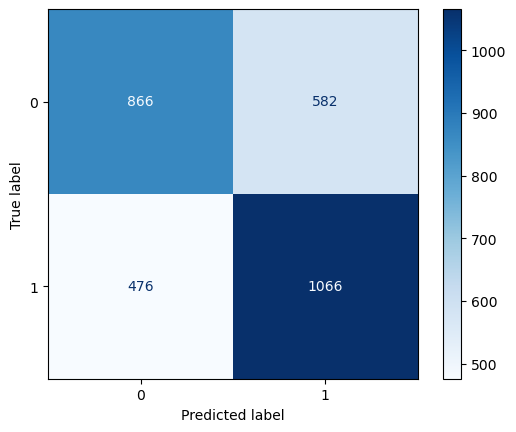

In [92]:
#use sklearn to make the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LogReg, x_test, y_test, cmap=plt.cm.Blues)

Now lets look at the F1 score

In [62]:
#calculate the f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6683385579937303

The F1 score is 0.67, wich means our model is doing pretty good.
Lets look at the classification report.

In [63]:
#see multi class classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62      1448
           1       0.65      0.69      0.67      1542

    accuracy                           0.65      2990
   macro avg       0.65      0.64      0.64      2990
weighted avg       0.65      0.65      0.65      2990



# 2.2 Multi class classification

The second part of the prediction challenge is about predicting whether the price of a rental is medium, low, or high, through multi class classification methods. The prediction will be made, via a decision tree, and random forest classifiers, whose performance will later be evaluated.

We will start by importing sklearn packages that will be used.

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score

For the multi sclass classification the dataset will be splited in three parts: low price (<0.33 quantile), medium price (<0.66 quantile), and high price (>0.66 quantile). Also, we will check how many observations does each part have, and are they of the similar length.

In [202]:
#define a low, medium, and high price threshold based on quantiles
q1=data['price'].quantile(0.33)  #define 33% quantile
q2=data['price'].quantile(0.66)  #define 66% quantile
data['price_class']=np.where(data['price']<=q1, 'low', (np.where(data['price']<=q2, 'medium', 'high')))
data['price_class'].value_counts()   #count observations in each part

C:\Users\Lado\AppData\Local\Temp/ipykernel_10908/3391605047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_class']=np.where(data['price']<=q1, 'low', (np.where(data['price']<=q2, 'medium', 'high')))


high      3024
medium    2985
low       2960
Name: price_class, dtype: int64

In [204]:
#dataset is splited in a way that 70% is used as a training set, and remaining 30% as a testing set.
split = int(len(data)*2/3)  #split data into 2/3 and 1/3 of the total data
train = data[:split]       #assign 2/3 to training
test = data[split:]        #assign 1/3 to testing

Now we can convert the two selected variables into dummy variables for the further steps, and display the newly created columns.

In [205]:
train=pd.get_dummies(train, columns=['neighbourhood','room_type'])
test=pd.get_dummies(test, columns=['neighbourhood','room_type'])

In [206]:
train.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'price_class',
       'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

Features are selected to be all the dummy variables, review values, minimum nights, and availability, which are then put into training and testing set.

In [207]:
#trainset
x_train = train[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm',
       'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room']]
#testset
x_test = test[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm',
       'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room']]
 
#target variable-->low, mid, high price
y_train = train['price_class']
y_test=test['price_class']

Decision tree classifier is simple to interpret, and understand. On top of that, requires little data preparation without data normalization, but includes creating dummy variables, as seen above.

Now we will create a classifier object, and once we have optimized the parameter values, we can manualy input the recommended parameter values back into our model.

In [161]:
clt = DecisionTreeClassifier(max_depth=10, min_samples_leaf= 40, min_samples_split = 2, min_weight_fraction_leaf=0)  #create decision tree classifier object
clt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=40,
                       min_weight_fraction_leaf=0)

Scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. In other words, we are going to iterate through all the combinations of parameter values from the grid, and identify the highest-score parameter values combination.

Reference: (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), (https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)

In [92]:
#create parameters grid, in this case we will select 6 values per parameter
param_grid = {
              "max_depth": [1, 3, 5, 10, 15, 30],   #max depth of the tree
              "min_samples_split": [2, 5, 10, 20, 30, 40],    #min number of samples required to split an internal node
              "min_samples_leaf": [1, 10, 20, 40, 60, 80],    #min number of samples required to be at a leaf node
              "min_weight_fraction_leaf": [0, 0.1, 0.2, 0.3, 0.4, 0.5]}   #min weighted fraction of the sum total of weights at leaf node
#create grid-search object with default 5-fold cross-validation(cv)
grid = GridSearchCV(estimator=clt, param_grid=param_grid, cv=5)  
grid_result = grid.fit(x_train, y_train)  #fit the model

In [158]:
#mean cv score of the best estimator, and parameter setting that gave the best results  
print("Best score is: %f with %s" % (grid_result.best_score_, grid_result.best_params_))

Best score is: 0.527845 with {'max_depth': 10, 'min_samples_leaf': 40, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}


Now that our model is trained, we can obtain the predictions of the model using the test set (x_test).

In [162]:
y_pred_tree = clt.predict(x_test)

In [163]:
#evaluate quality of predictions through f1-score, accuracy, and confusion matrix.
print("Accuracy is %f" % accuracy_score(y_test,y_pred_tree))
print("F1-score is %f" % f1_score(y_test,y_pred_tree,average='weighted'))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_tree))

Accuracy is 0.490635
F1-score is 0.492019
Confusion matrix:
[[526 120 304]
 [208 493 304]
 [387 200 448]]


It is visible that f1-score does not have the same value, as previously promised by optimized parameters. It is because optimization algorithms rely on a large number of iterations, to find the best combination of parameter values, and in this case, it might be the tree depth to find good parameters. However, increasing the tree depth will result in a large computation time, so we can label it as a fair performance. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


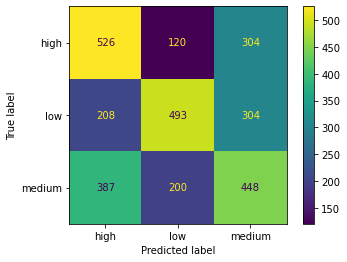

In [164]:
plot_confusion_matrix(clt, x_test, y_test)  
plt.show()

In [166]:
print('high:',526/(526+120+304))
print('low:',493/(208+493+304))
print('medium:',448/(387+200+448))

high: 0.5536842105263158
low: 0.490547263681592
medium: 0.43285024154589374


The metrics from the consfusion matrix suggest that the decision tree classifier is not doing the best job, especially when predicting the medium price class, where we have 43% observations predicted correctly. However, the mhigh price class is doing a better job by predicting 55% of the observations correctly.

--------------------------------------------------------------------------------------------------------------------------------

Decision tree classifier often suffer from the overfitting, due its growth with lack of control, which then results in poor f1-score. The new classifier, the random forest classifier, will now be implemented. Its final output is based on majority ranking, which will reduce the overfitting. However, it is computationally more expensive, so the less parameter values will be passed when creating grid.

Once again we have optimized the parameter values, so we can manualy input the recommended parameter values into our model and create a classifier object.

In [172]:
cltf = RandomForestClassifier(max_depth=10, random_state=1000, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0)  #create random forest classifier object
cltf.fit(x_train,y_train)    #train the model

RandomForestClassifier(max_depth=10, min_weight_fraction_leaf=0,
                       random_state=1000)

In [168]:
#create parameters grid, in this case we will select 3,4 values per parameter
param_grid = {
              "max_depth": [1, 3, 5, 10],    #max depth of the tree
              "random_state": [250, 500, 750, 1000],    #ensure that results that can be reproduced
              "min_samples_split": [2, 5, 10, 20],     #min number of samples required to split an internal node
              "min_samples_leaf": [1, 10, 20],         #min number of samples required to be at a leaf node
              "min_weight_fraction_leaf": [0, 0.1, 0.2]}   #min weighted fraction of the sum total of weights at leaf node
#create grid-search object with default 5-fold cross-validation(cv)
grid = GridSearchCV(estimator=cltf, param_grid=param_grid, cv=5)
grid_result = grid.fit(x_train, y_train)    #fit the model

In [169]:
# summarize results
print("Best score is: %f with %s" % (grid_result.best_score_, grid_result.best_params_))

Best score is: 0.551763 with {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'random_state': 1000}


Now that our model is trained, we can obtain the predictions of the model using the test set.

In [173]:
#make predictions from the random forest model
y_pred_forest = cltf.predict(x_test)  

In [174]:
#evaluate quality of predictions through f1-score, accuracy, and confusion matrix.
print("Accuracy is %f" % accuracy_score(y_test,y_pred_forest))
print("F1-score is %f" % f1_score(y_test,y_pred_forest, average='weighted'))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_forest))

Accuracy is 0.524749
F1-score is 0.528755
Confusion matrix:
[[520  51 379]
 [158 474 373]
 [312 148 575]]


This time f1-score does have the same value, as previously obtained by optimized parameters. It is because random forest does not rely on the feature importance given by only one decision tree, but many randomly choosen features instead. This randomized feature selection makes random forest much more accurate than a decision tree, and therefore, gives highest score. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


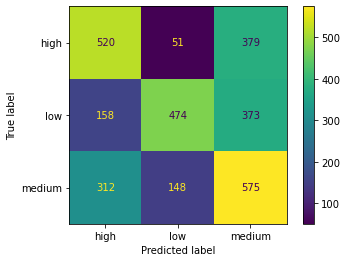

In [175]:
plot_confusion_matrix(cltf, x_test, y_test)  
plt.show()

In [177]:
print('high:',520/(520+51+379))
print('low:',474/(158+474+373))
print('medium:',575/(312+148+575))

high: 0.5473684210526316
low: 0.4716417910447761
medium: 0.5555555555555556


The metrics from the consfusion matrix suggest that the random forest classifier is doing better job than decision tree clasiffier when predicting high, and medium price classes. The ratio of correct predictions for high, and medium price classes is more balanced, as seen above. However, correct predictions for the low price class dropped to 47%.

A decision tree relies on the feature importance given by a single decision tree, which results in an unbalanced ratio of correct predictions through different classes, as visible when comparing the difference between the highest and lowest scores of the classes of both classifiers. High importance was given to the high price class in the first confusion matrix, underperforming medium, and low price classes. Because of its randomized feature selection, random forest is much more accurate and less likely to have poor performance on any of the three classes (it happens to be low price unexpectedly). Therefore, random forest is a better pick, when we want to take into consideration all the features.

# 3. Exploratory component

In [ ]:
#write short intro of what will be done here

## 3.1 Stockholm - Visualization and Modelling

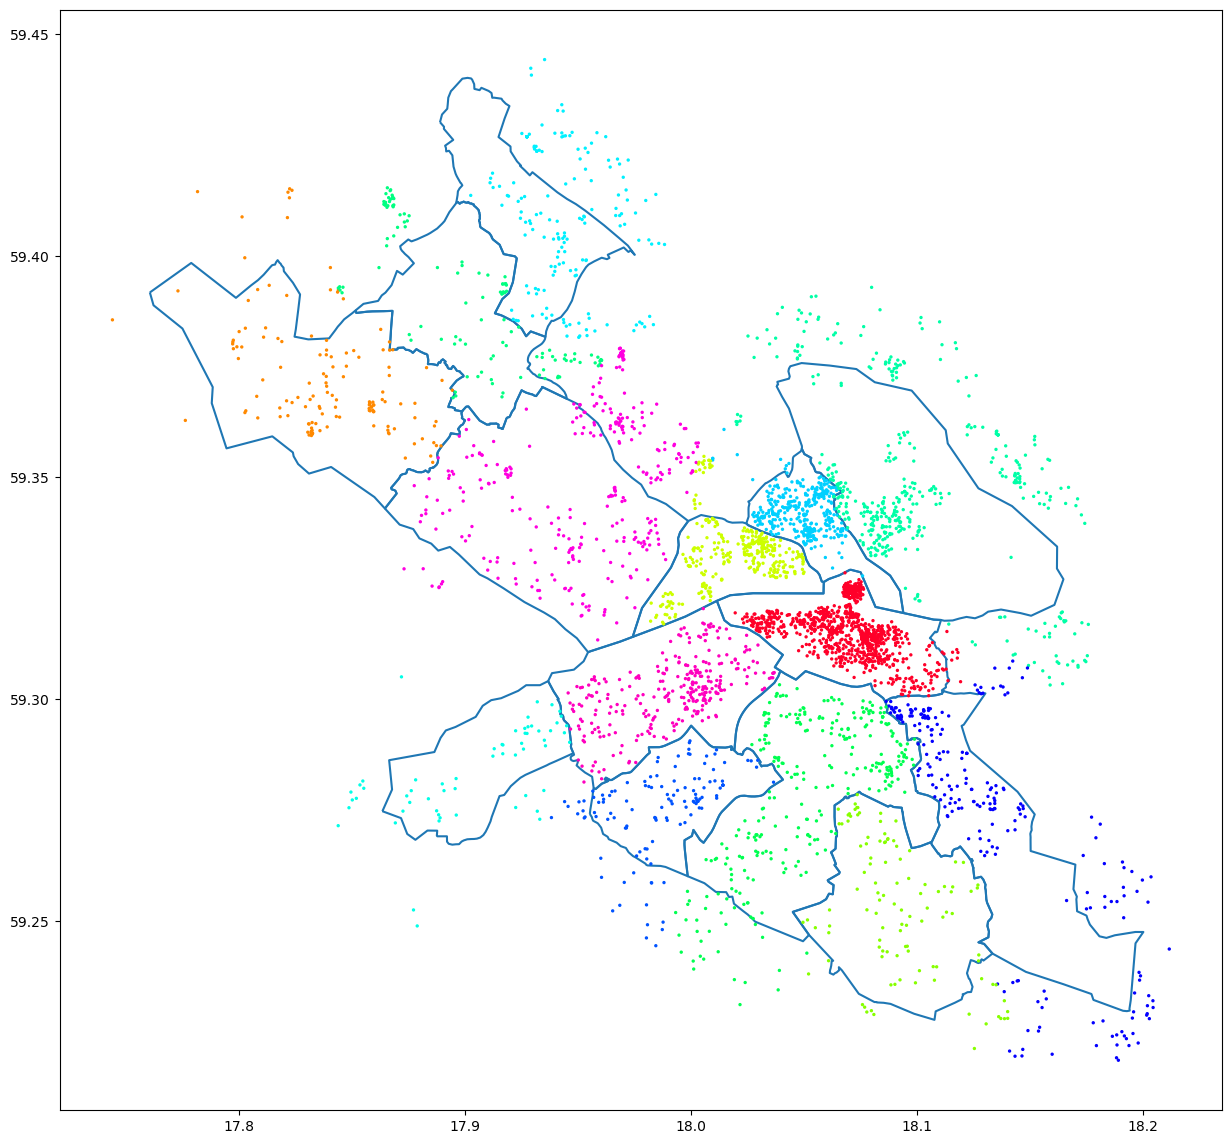

In [115]:
stockholm_data=pd.read_csv("Stockholm_listings.csv")
theSwedishHoods=gpd.read_file('stockholm_neighbourhoods.geojson')

stockholm_colors = [float(hash(s) % 256) / 256 for s in stockholm_data.neighbourhood]      

theSwedishHoods.boundary.plot(figsize=(15,15))
plt.scatter(stockholm_data.longitude,stockholm_data.latitude, s=2,c=stockholm_colors,cmap="gist_rainbow",zorder=10)

In [116]:
stockholm_data=stockholm_data[stockholm_data['availability_365']!=0]   #drop rows containing 0 in the 'availability_365' column
stockholm_data['reviews_per_month']=stockholm_data['reviews_per_month'].fillna(0) #Set n/a = 0 for reviews_per_month. 

In [117]:

stockholm_low_price_threshold = stockholm_data['price'].median()
stockholm_data['low_price'] = np.where(stockholm_data['price'] < stockholm_low_price_threshold, 1, 0)

stockholm_data = pd.get_dummies(stockholm_data, columns=['neighbourhood', 'room_type'])


In [118]:
stockholm_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'low_price',
       'neighbourhood_Bromma', 'neighbourhood_Enskede-Årsta-Vantörs',
       'neighbourhood_Farsta', 'neighbourhood_Hägersten-Liljeholmens',
       'neighbourhood_Hässelby-Vällingby', 'neighbourhood_Kungsholmens',
       'neighbourhood_Norrmalms', 'neighbourhood_Rinkeby-Tensta',
       'neighbourhood_Skarpnäcks', 'neighbourhood_Skärholmens',
       'neighbourhood_Spånga-Tensta', 'neighbourhood_Södermalms',
       'neighbourhood_Älvsjö', 'neighbourhood_Östermalms',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [119]:
stockholm_list=['minimum_nights', 'reviews_per_month', 'calculated_host_listings_count',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room']

stockholm_x = stockholm_data[stockholm_list]
stockholm_y = stockholm_data['low_price']

In [120]:
x_train = train[stockholm_list]
x_test = test[stockholm_list]

LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

0.5896321070234114
0.620337849138652
0.6929474384564205


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


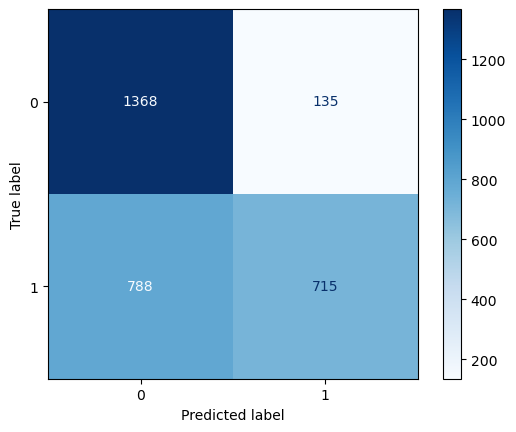

In [121]:
print(LogReg.score(x_test, y_test))
print(LogReg.score(x_train, y_train))
print(LogReg.score(stockholm_x, stockholm_y))
plot_confusion_matrix(LogReg, stockholm_x, stockholm_y, cmap=plt.cm.Blues)

0.5896321070234114
0.620337849138652
0.6929474384564205


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


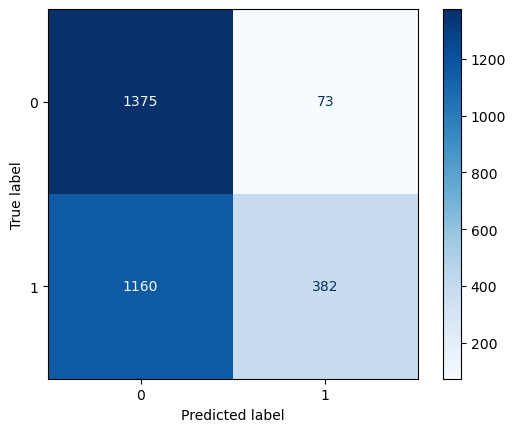

In [123]:
LogReg_stockholm = LogisticRegression(max_iter=100000)
LogReg_stockholm.fit(stockholm_x_test, stockholm_y_test)

print(LogReg.score(x_test, y_test))
print(LogReg.score(x_train, y_train))
print(LogReg.score(stockholm_x, stockholm_y))
plot_confusion_matrix(LogReg_stockholm, x_test, y_test, cmap=plt.cm.Blues)

## 3.2 Price/person

The dataset used in the initial analysis has one rather big limitation. It doesn't take into consideration the size of the AirBnB locations. As AirBnBs can range in size from large apartments and townhouses to small rooms, it might be relevant to see how the model performs when predicting the price per person. 
This can be done by using the full dataset from Inside AirBnB which provides the maximum number of persons for each location. This can be turned into a price/person variable. In the code below, we will investigate whether our binary model can predict this better than it can the total price. 
As such, the method will be much the same, but with less text inbetween. 

In [208]:
# Import expanded dataset
data_expanded=pd.read_csv("CPH_listing_expanded.csv")
print(len(data_expanded))
data_expanded.head()

13815


id                         listing_url       scrape_id last_scraped  \
0   6983   https://www.airbnb.com/rooms/6983  20220924142144   2022-09-24   
1  26057  https://www.airbnb.com/rooms/26057  20220924142144   2022-09-25   
2  26473  https://www.airbnb.com/rooms/26473  20220924142144   2022-09-25   
3  29118  https://www.airbnb.com/rooms/29118  20220924142144   2022-09-25   
4  31094  https://www.airbnb.com/rooms/31094  20220924142144   2022-09-24   

            source                                               name  \
0  previous scrape                               Copenhagen 'N Livin'   
1      city scrape                Lovely house - most attractive area   
2      city scrape          City Centre Townhouse Sleeps 1-10 persons   
3      city scrape                    Best Location in Cool Istedgade   
4  previous scrape  Beautiful, spacious, central, renovated Penthouse   

                                         description  \
0  Lovely apartment located in the hip Nørrebro a...   
1  Our lovely house in the center of the city is ...   
2  GUESTHOUSE ON KNABROSTRÆDE - located in the ab...   
3  <b>The space</b><br />The apartment is situate...   
4  Welcome to our home, we hope you will enjoy Wo...   

                               neighborhood_overview  \
0  Nice bars and cozy cafes just minutes away, ye...   
1  The neighborhood is the most famous one and th...   
2                                                NaN   
3                                                NaN   
4  What else is nearby?<br />To be honest, We thi...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/42044170/f63c...    16774  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...   109777  ...   
2  https://a0.muscache.com/pictures/8e132ba0-b68c...   112210  ...   
3  https://a0.muscache.com/pictures/b83c7003-367a...   125230  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...   129976  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.89                   4.73                4.71   
1                        4.86                   4.94                4.81   
2                        4.70                   4.89                4.59   
3                        5.00                   4.87                4.80   
4                        4.82                   4.80                4.53   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              1   
1     NaN                f                              1   
2     NaN                f                              3   
3     NaN                f                              1   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           1   
2                                           3   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.08  
1                                           0              0.55  
2                                           0              2.06  
3                                           0              0.16  
4                                           0              0.13  

[5 rows x 75 columns]

In [179]:
#Convert price to interger
data_expanded = data_expanded.replace({'\$':''}, regex = True)
data_expanded['price'] = data_expanded['price'].str.replace(',', '').astype(float)

As the initial dataset and expanded dataset contain information for the same accomodations, we elect to use the initial dataset as much as possible, to make things easier. 

In [180]:
data2=pd.read_csv("listings_CPH.csv") #New copy of initial dataset
print(len(data2)) #The initial dataset and the expanded dataset should have the same lengths. 

13815


In [181]:
#Calculate price per person and add to dataset 
data2['ppp'] = data_expanded['price'].astype(float) / data_expanded['accommodates'].astype(float)
data2=data2[data2['availability_365']!=0]   #drop rows containing 0 in the 'availability_365' column
data2['reviews_per_month']=data2['reviews_per_month'].fillna(0) #Set n/a = 0 for reviews_per_month. 

In [182]:
#define a low price threshold
#we will use the median price as the threshold for low price
low_price_threshold_ppp = data2['ppp'].median()


#Start by creating a new column called 'low_price', assign 1 to the low price and 0 to the high price
data2['low_price'] = np.where(data2['ppp'] < low_price_threshold_ppp, 1, 0)

In [61]:
#Create model
from sklearn.linear_model import LogisticRegression
LogReg2 = LogisticRegression(max_iter=100000)

Now we have a empty model.
Start by creating a test set with (2/3) of the data and training set with the remaining (1/3)

In [185]:
#create the training and testing sets
#we will use 2/3 of the data for training and 1/3 for testing
split2 = int(len(data2)*2/3)
train2 = data2[:split2]
test2 = data2[split2:]

Now we want to make dummy variables for the group variables, that allow us to have a single regression equation on multiple groups

In [186]:
data2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'ppp',
       'low_price'],
      dtype='object')

In [187]:
#make dummy variables for neighbourhood and room type
train2 = pd.get_dummies(train2, columns=['neighbourhood', 'room_type'])
test2 = pd.get_dummies(test2, columns=['neighbourhood', 'room_type'])

Now we want to see what kind of data is in each column

In [188]:
train2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'ppp',
       'low_price', 'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

Now we make the x train and test sets with useful predictors.
Y train and test set with our target variable.

In [189]:
#create a list of features we intend to use
base_list2 = ['minimum_nights', 'reviews_per_month', 'calculated_host_listings_count',
        'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room']

x_train2 = train2[base_list2]
x_test2 = test2[base_list2]

y_train2 = train2['low_price']
y_test2 = test2['low_price']

Check what data is in our train variables 

In [190]:
x_train2[:5].T

1     2     3     5       6
minimum_nights                           4.00  3.00  7.00  3.00  100.00
reviews_per_month                        0.55  2.06  0.16  0.54    0.05
calculated_host_listings_count           1.00  3.00  1.00  2.00    1.00
neighbourhood_Amager Vest                0.00  0.00  0.00  0.00    0.00
neighbourhood_Amager st                  0.00  0.00  0.00  0.00    0.00
neighbourhood_Bispebjerg                 0.00  0.00  0.00  0.00    0.00
neighbourhood_Brnshj-Husum               0.00  0.00  0.00  0.00    0.00
neighbourhood_Frederiksberg              0.00  0.00  0.00  0.00    0.00
neighbourhood_Indre By                   1.00  1.00  0.00  0.00    0.00
neighbourhood_Nrrebro                    0.00  0.00  0.00  0.00    0.00
neighbourhood_Valby                      0.00  0.00  0.00  0.00    0.00
neighbourhood_Vanlse                     0.00  0.00  0.00  0.00    0.00
neighbourhood_Vesterbro-Kongens Enghave  0.00  0.00  1.00  1.00    0.00
neighbourhood_sterbro                    0.00  0.00  0.00  0.00    1.00
room_type_Entire home/apt                1.00  1.00  1.00  1.00    1.00
room_type_Hotel room                     0.00  0.00  0.00  0.00    0.00
room_type_Private room                   0.00  0.00  0.00  0.00    0.00

Now it is time to use logistic regression to train the model

In [68]:
#use logistic regression to train the model
LogReg2.fit(x_train2, y_train2)

LogisticRegression(max_iter=100000)

Now we want to see how our model did.
Start by looking at the accuracy

In [69]:
print(LogReg2.score(x_test2, y_test2))
print(LogReg2.score(x_train2, y_train2))

0.6558528428093645
0.6084629536711825


Since the training score is higher than the testing score, we can conclude that the model is overfitting. Next we want to take a look at the confusion matrix.

In [70]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred2 = LogReg2.predict(x_test2)
cm = confusion_matrix(y_test2, y_pred2)
print(cm)

[[1098  483]
 [ 546  863]]


Now this matrix is not very clear, lets make a more graphical version

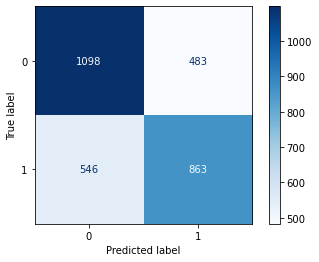

In [71]:
#use sklearn to make the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LogReg2, x_test2, y_test2, cmap=plt.cm.Blues)

Now lets look at the F1 score

In [73]:
#calculate the f1 score
from sklearn.metrics import f1_score
f1_score(y_test2, y_pred2)

0.626497277676951

We see that the resulting F1-score is slightly lower, when compared to the prediction of total price. From this, we can see that the model isn't better when trying to model price per person. 

## 3.3 Clustering - AirBnB Areas

In some cities, AirBnB has proven problematic because large percentages of communinities end up as short-term rentals instead of permanent residencies. With this in mind, it might be relevant to get a better understanding of exactly where in Copenhagen, the AirBnBs are located most closely together. This can be done using density-based clustering and the DBSCAN algorithm. 

In [297]:
from sklearn.cluster import DBSCAN 
data_clustering=pd.read_csv("listings_CPH.csv")

For the DBSCAN algorith, we need to define two things: 

    1. The maximum distance between two datapoints for them to be considered in the same cluster (EPS). We use 0.0005 which is roughly equaivalent to 111m. 
    2. The minimum number of datapoints in a cluster. We elect to use 25. 

In [298]:
dbs=DBSCAN(min_samples=25, eps=0.001) 

The algorithm is then fitted to the data. 

In [299]:
dbs.fit(data_clustering[['longitude', 'latitude']])

DBSCAN(eps=0.001, min_samples=25)

The DBSCAN algorithm labels all points outside clusters as -1. With this in mind, we can easily remove the irrelevant datapoints. 

In [300]:
data_clustering["c_labels"]=dbs.labels_
data_clustering=data_clustering[data_clustering['c_labels']!= -1] 

The labels applied to the remaining datapoints, can be used for determining colors when plotting. 

<Figure size 1800x1200 with 0 Axes>

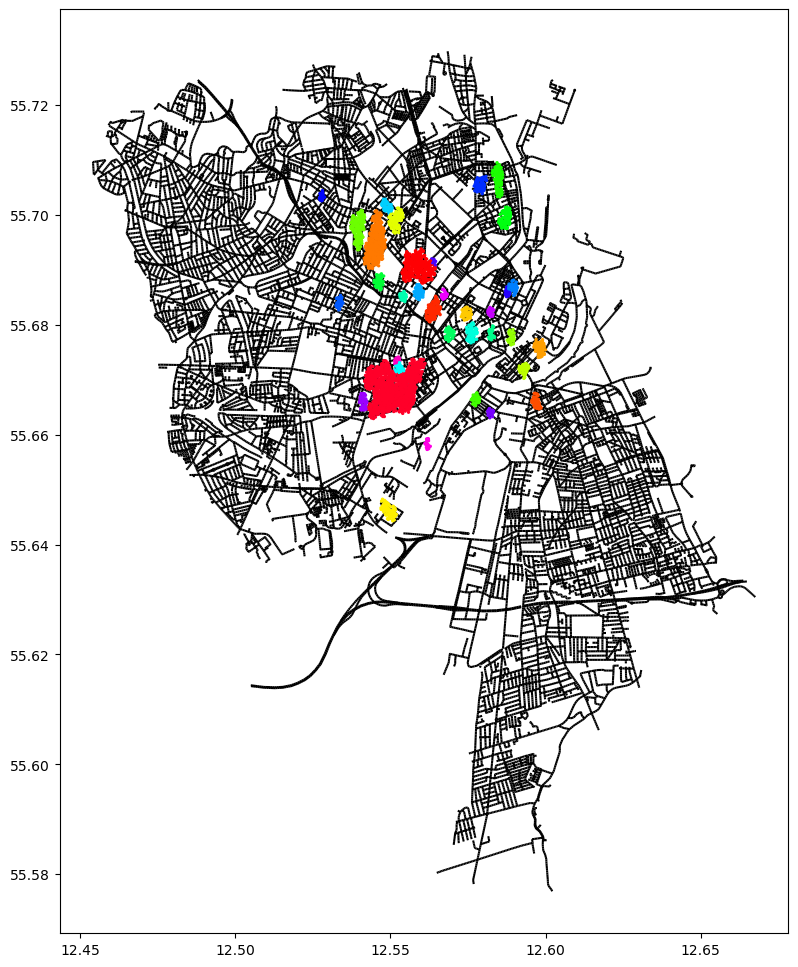

In [302]:
plt.figure(figsize=(18, 12))
map_data.plot(column="Mixed_BC",zorder=0,cmap="gray",figsize=(18,12)) #Road plot. See earlier in this report. 
plt.scatter(data_clustering['longitude'], data_clustering['latitude'],cmap="gist_rainbow",s=2,c=data_clustering['c_labels']) #Scatter the datapoints
plt.show()

## 3.4 Extended dataset

In [212]:
#read file listings.csv
df = pd.read_csv('listings.csv')

Now lets see how the data looks like. We have a lot of variables so we want to specify showing all columns

In [213]:
#show all columns
pd.set_option('display.max_columns', None)

#show data
df.head()

id                         listing_url       scrape_id last_scraped  \
0   6983.0   https://www.airbnb.com/rooms/6983  20220924142144   2022-09-24   
1  26057.0  https://www.airbnb.com/rooms/26057  20220924142144   2022-09-25   
2  26473.0  https://www.airbnb.com/rooms/26473  20220924142144   2022-09-25   
3  29118.0  https://www.airbnb.com/rooms/29118  20220924142144   2022-09-25   
4  31094.0  https://www.airbnb.com/rooms/31094  20220924142144   2022-09-24   

            source                                               name  \
0  previous scrape                               Copenhagen 'N Livin'   
1      city scrape                Lovely house - most attractive area   
2      city scrape          City Centre Townhouse Sleeps 1-10 persons   
3      city scrape                    Best Location in Cool Istedgade   
4  previous scrape  Beautiful, spacious, central, renovated Penthouse   

                                         description  \
0  Lovely apartment located in the hip Nørrebro a...   
1  Our lovely house in the center of the city is ...   
2  GUESTHOUSE ON KNABROSTRÆDE - located in the ab...   
3  <b>The space</b><br />The apartment is situate...   
4  Welcome to our home, we hope you will enjoy Wo...   

                               neighborhood_overview  \
0  Nice bars and cozy cafes just minutes away, ye...   
1  The neighborhood is the most famous one and th...   
2                                                NaN   
3                                                NaN   
4  What else is nearby?<br />To be honest, We thi...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/42044170/f63c...    16774   
1  https://a0.muscache.com/pictures/miso/Hosting-...   109777   
2  https://a0.muscache.com/pictures/8e132ba0-b68c...   112210   
3  https://a0.muscache.com/pictures/b83c7003-367a...   125230   
4  https://a0.muscache.com/pictures/miso/Hosting-...   129976   

                                   host_url host_name  host_since  \
0   https://www.airbnb.com/users/show/16774     Simon  2009-05-12   
1  https://www.airbnb.com/users/show/109777      Kari  2010-04-17   
2  https://www.airbnb.com/users/show/112210     Julia  2010-04-22   
3  https://www.airbnb.com/users/show/125230      Nana  2010-05-15   
4  https://www.airbnb.com/users/show/129976      Ebbe  2010-05-22   

         host_location                                         host_about  \
0  Copenhagen, Denmark  I'm currently working as an environmental cons...   
1  Copenhagen, Denmark  We are a family with 2 children, and living in...   
2  Copenhagen, Denmark  Active young woman, started as an expat in Cop...   
3  Copenhagen, Denmark  I have a Master of Arts in Musicology and I wo...   
4  Copenhagen, Denmark  Hi and welcome. My name is Ebbe, I am a medica...   

   host_response_time host_response_rate host_acceptance_rate  \
0  within a few hours               100%                  58%   
1  within a few hours               100%                  31%   
2      within an hour               100%                  95%   
3  within a few hours               100%                  33%   
4        within a day               100%                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/16774/profile...   
1                 f  https://a0.muscache.com/im/users/109777/profil...   
2                 f  https://a0.muscache.com/im/pictures/user/8a185...   
3                 f  https://a0.muscache.com/im/users/125230/profil...   
4                 f  https://a0.muscache.com/im/users/129976/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/16774/profile...           Nørrebro   
1  https://a0.muscache.com/im/users/109777/profil...           Indre By   
2  https://a0.muscache.com/im/pictures/user/8a185...           Indre By   
3  https://a0.m

We begin with dropping variable that have only NaN values

In [214]:
#remove columns that have only Nan values
df = df.dropna(axis=1, how='all')


Now lets drop variables that have the same value for all rentals. We do that as those variables won´t tell us anything as all rentals will have the same value for those variables.

In [215]:
#remove columns that have the same value for all rows
df = df.loc[:, df.apply(pd.Series.nunique) != 1]


In [1422]:
df.head()

id                         listing_url last_scraped           source  \
0   6983   https://www.airbnb.com/rooms/6983   2022-09-24  previous scrape   
1  26057  https://www.airbnb.com/rooms/26057   2022-09-25      city scrape   
2  26473  https://www.airbnb.com/rooms/26473   2022-09-25      city scrape   
3  29118  https://www.airbnb.com/rooms/29118   2022-09-25      city scrape   
4  31094  https://www.airbnb.com/rooms/31094   2022-09-24  previous scrape   

                                                name  \
0                               Copenhagen 'N Livin'   
1                Lovely house - most attractive area   
2          City Centre Townhouse Sleeps 1-10 persons   
3                    Best Location in Cool Istedgade   
4  Beautiful, spacious, central, renovated Penthouse   

                                         description  \
0  Lovely apartment located in the hip Nørrebro a...   
1  Our lovely house in the center of the city is ...   
2  GUESTHOUSE ON KNABROSTRÆDE - located in the ab...   
3  <b>The space</b><br />The apartment is situate...   
4  Welcome to our home, we hope you will enjoy Wo...   

                               neighborhood_overview  \
0  Nice bars and cozy cafes just minutes away, ye...   
1  The neighborhood is the most famous one and th...   
2                                                NaN   
3                                                NaN   
4  What else is nearby?<br />To be honest, We thi...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/42044170/f63c...    16774   
1  https://a0.muscache.com/pictures/miso/Hosting-...   109777   
2  https://a0.muscache.com/pictures/8e132ba0-b68c...   112210   
3  https://a0.muscache.com/pictures/b83c7003-367a...   125230   
4  https://a0.muscache.com/pictures/miso/Hosting-...   129976   

                                   host_url host_name  host_since  \
0   https://www.airbnb.com/users/show/16774     Simon  2009-05-12   
1  https://www.airbnb.com/users/show/109777      Kari  2010-04-17   
2  https://www.airbnb.com/users/show/112210     Julia  2010-04-22   
3  https://www.airbnb.com/users/show/125230      Nana  2010-05-15   
4  https://www.airbnb.com/users/show/129976      Ebbe  2010-05-22   

         host_location                                         host_about  \
0  Copenhagen, Denmark  I'm currently working as an environmental cons...   
1  Copenhagen, Denmark  We are a family with 2 children, and living in...   
2  Copenhagen, Denmark  Active young woman, started as an expat in Cop...   
3  Copenhagen, Denmark  I have a Master of Arts in Musicology and I wo...   
4  Copenhagen, Denmark  Hi and welcome. My name is Ebbe, I am a medica...   

   host_response_time host_response_rate host_acceptance_rate  \
0  within a few hours               100%                  58%   
1  within a few hours               100%                  31%   
2      within an hour               100%                  95%   
3  within a few hours               100%                  33%   
4        within a day               100%                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/16774/profile...   
1                 f  https://a0.muscache.com/im/users/109777/profil...   
2                 f  https://a0.muscache.com/im/pictures/user/8a185...   
3                 f  https://a0.muscache.com/im/users/125230/profil...   
4                 f  https://a0.muscache.com/im/users/129976/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/16774/profile...           Nørrebro   
1  https://a0.muscache.com/im/users/109777/profil...           Indre By   
2  https://a0.muscache.com/im/pictures/user/8a185...           Indre By   
3  https://a0.muscache.com/im/users/125230/profil...          Vesterbro   
4  https://a0.muscache.com/im/users/129976/pro

We will not use rentals that are not available for renting. Lets check which values has_availabilty can take.

In [216]:
#check has_avialability potential values
df['has_availability'].unique()

array(['t', 'f'], dtype=object)

So we will take out rows where the value for the variable "has_availability" is "f" (false). Additionally we will take out rows where the value for "availability_365" is "0" as that means the rental is not available.

In [217]:
#remove all rows where has_availability is f
df = df[df['has_availability'] != 'f']

#remove all rows where availability_365 is 0
df = df[df['availability_365'] != 0]

In [218]:
df.head()

id                         listing_url last_scraped       source  \
1  26057.0  https://www.airbnb.com/rooms/26057   2022-09-25  city scrape   
2  26473.0  https://www.airbnb.com/rooms/26473   2022-09-25  city scrape   
3  29118.0  https://www.airbnb.com/rooms/29118   2022-09-25  city scrape   
5  32379.0  https://www.airbnb.com/rooms/32379   2022-09-25  city scrape   
6  32841.0  https://www.airbnb.com/rooms/32841   2022-09-24  city scrape   

                                                name  \
1                Lovely house - most attractive area   
2          City Centre Townhouse Sleeps 1-10 persons   
3                    Best Location in Cool Istedgade   
5  165 m2  artist flat on Vesterbro, with 2 bathr...   
6                Cozy flat for Adults/Quiet for kids   

                                         description  \
1  Our lovely house in the center of the city is ...   
2  GUESTHOUSE ON KNABROSTRÆDE - located in the ab...   
3  <b>The space</b><br />The apartment is situate...   
5  Bright Artistic luxury apartment in very trend...   
6  Our flat is placed in a Central AND Quiet neig...   

                               neighborhood_overview  \
1  The neighborhood is the most famous one and th...   
2                                                NaN   
3                                                NaN   
5  Værnedamsvej area is super hip area, we call i...   
6                                                NaN   

                                         picture_url  host_id  \
1  https://a0.muscache.com/pictures/miso/Hosting-...   109777   
2  https://a0.muscache.com/pictures/8e132ba0-b68c...   112210   
3  https://a0.muscache.com/pictures/b83c7003-367a...   125230   
5  https://a0.muscache.com/pictures/4088872/c50ae...   140105   
6  https://a0.muscache.com/pictures/28047599/8efd...   142143   

                                   host_url       host_name  host_since  \
1  https://www.airbnb.com/users/show/109777            Kari  2010-04-17   
2  https://www.airbnb.com/users/show/112210           Julia  2010-04-22   
3  https://www.airbnb.com/users/show/125230            Nana  2010-05-15   
5  https://www.airbnb.com/users/show/140105            Lise  2010-06-07   
6  https://www.airbnb.com/users/show/142143  Anders & Maria  2010-06-10   

         host_location                                         host_about  \
1  Copenhagen, Denmark  We are a family with 2 children, and living in...   
2  Copenhagen, Denmark  Active young woman, started as an expat in Cop...   
3  Copenhagen, Denmark  I have a Master of Arts in Musicology and I wo...   
5  Copenhagen, Denmark  As profession - Set and Costumedesigner for Av...   
6  Copenhagen, Denmark  Anders:\nHitchhiked 100.000 km's, Been publicl...   

   host_response_time host_response_rate host_acceptance_rate  \
1  within a few hours               100%                  31%   
2      within an hour               100%                  95%   
3  within a few hours               100%                  33%   
5  within a few hours               100%                  94%   
6                 NaN                NaN                  NaN   

  host_is_superhost                                 host_thumbnail_url  \
1                 f  https://a0.muscache.com/im/users/109777/profil...   
2                 f  https://a0.muscache.com/im/pictures/user/8a185...   
3                 f  https://a0.muscache.com/im/users/125230/profil...   
5                 t  https://a0.muscache.com/im/users/140105/profil...   
6                 f  https://a0.muscache.com/im/pictures/user/88f79...   

                                    host_picture_url host_neighbourhood  \
1  https://a0.muscache.com/im/users/109777/profil...           Indre By   
2  https://a0.muscache.com/im/pictures/user/8a185...           Indre By   
3  https://a0.muscache.com/im/users/125230/profil...          Vesterbro   
5  https://a0.muscache.com/im/users/140105/profil...          Vesterbro   
6  https://a0.muscache.c

We will take out all columns that have clearly no effect on the price. That is for example, the columns that include a URL, host name and host ID.

We will as well take out columns that have a unique value for each rental, that is for example apartment description, host about and neigbhorhood overview, and we will take out date values. Even though these variables do potentially impact the price it will not help the prediction as likely no rental has the excact same description.
The variables that will be removed can be seen in the following code. 

In [219]:
#remove columns id, listing_url, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_about, host_thumbnail_url and host_picture_url
df = df.drop(['id', 'listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'neighbourhood', 'amenities', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped', 'first_review', 'last_review', ], axis=1)

Lets see how our data looks now

In [220]:
df.head()

host_response_time host_response_rate host_acceptance_rate  \
1  within a few hours               100%                  31%   
2      within an hour               100%                  95%   
3  within a few hours               100%                  33%   
5  within a few hours               100%                  94%   
6                 NaN                NaN                  NaN   

  host_is_superhost host_neighbourhood  host_listings_count  \
1                 f           Indre By                  2.0   
2                 f           Indre By                  6.0   
3                 f          Vesterbro                  1.0   
5                 t          Vesterbro                  3.0   
6                 f           Østerbro                  1.0   

   host_total_listings_count host_has_profile_pic host_identity_verified  \
1                        3.0                    t                      t   
2                       23.0                    t                      t   
3                        1.0                    t                      t   
5                        4.0                    t                      t   
6                        1.0                    t                      t   

      neighbourhood_cleansed   latitude  longitude       property_type  \
1                   Indre By  55.693070  12.576490         Entire home   
2                   Indre By  55.676020  12.575400    Entire townhouse   
3  Vesterbro-Kongens Enghave  55.670230  12.555040  Entire rental unit   
5  Vesterbro-Kongens Enghave  55.672638  12.552493  Entire rental unit   
6                    sterbro  55.711760  12.570910  Entire rental unit   

         room_type  accommodates bathrooms_text  bedrooms  beds      price  \
1  Entire home/apt             6      1.5 baths       4.0   4.0  $2,600.00   
2  Entire home/apt            11        2 baths       6.0   5.0  $3,250.00   
3  Entire home/apt             2         1 bath       1.0   1.0    $725.00   
5  Entire home/apt             4        2 baths       3.0   3.0  $1,280.00   
6  Entire home/apt             4         1 bath       2.0   2.0    $617.00   

   minimum_nights  maximum_nights has_availability  availability_30  \
1               4            1125                t                4   
2               3              31                t               11   
3               7              14                t                2   
5               3             365                t                1   
6             100            1125                t                0   

   availability_60  availability_90  availability_365  number_of_reviews  \
1               16               30               303                 59   
2               32               55                56                300   
3                2                2                59                 24   
5                1                1                60                 80   
6                0                6               281                  7   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
1                      8                       0                  4.91   
2                      7                       2                  4.53   
3                      2                       0                  4.92   
5                      5                       0                  4.90   
6                      0                       0                  4.57   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
1                    4.93                       4.96                   4.93   
2                    4.63                       4.44                   4.78   
3                    4.87                       4.73                   5.00   
5                    4.96                       4.92                   4.88   
6                    4.75                       4.50                   5.00   

   review_scores_communication  review_scores_location  re

Finally before we start visualizing the data, we will remove rentals where the price is NaN and where the price is 0.

In [221]:
#remove rows where price is Nan
df = df.dropna(subset=['price'])

#remove rows where price is 0
df = df[df['price'] != 0]

df.head()

host_response_time host_response_rate host_acceptance_rate  \
1  within a few hours               100%                  31%   
2      within an hour               100%                  95%   
3  within a few hours               100%                  33%   
5  within a few hours               100%                  94%   
6                 NaN                NaN                  NaN   

  host_is_superhost host_neighbourhood  host_listings_count  \
1                 f           Indre By                  2.0   
2                 f           Indre By                  6.0   
3                 f          Vesterbro                  1.0   
5                 t          Vesterbro                  3.0   
6                 f           Østerbro                  1.0   

   host_total_listings_count host_has_profile_pic host_identity_verified  \
1                        3.0                    t                      t   
2                       23.0                    t                      t   
3                        1.0                    t                      t   
5                        4.0                    t                      t   
6                        1.0                    t                      t   

      neighbourhood_cleansed   latitude  longitude       property_type  \
1                   Indre By  55.693070  12.576490         Entire home   
2                   Indre By  55.676020  12.575400    Entire townhouse   
3  Vesterbro-Kongens Enghave  55.670230  12.555040  Entire rental unit   
5  Vesterbro-Kongens Enghave  55.672638  12.552493  Entire rental unit   
6                    sterbro  55.711760  12.570910  Entire rental unit   

         room_type  accommodates bathrooms_text  bedrooms  beds      price  \
1  Entire home/apt             6      1.5 baths       4.0   4.0  $2,600.00   
2  Entire home/apt            11        2 baths       6.0   5.0  $3,250.00   
3  Entire home/apt             2         1 bath       1.0   1.0    $725.00   
5  Entire home/apt             4        2 baths       3.0   3.0  $1,280.00   
6  Entire home/apt             4         1 bath       2.0   2.0    $617.00   

   minimum_nights  maximum_nights has_availability  availability_30  \
1               4            1125                t                4   
2               3              31                t               11   
3               7              14                t                2   
5               3             365                t                1   
6             100            1125                t                0   

   availability_60  availability_90  availability_365  number_of_reviews  \
1               16               30               303                 59   
2               32               55                56                300   
3                2                2                59                 24   
5                1                1                60                 80   
6                0                6               281                  7   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
1                      8                       0                  4.91   
2                      7                       2                  4.53   
3                      2                       0                  4.92   
5                      5                       0                  4.90   
6                      0                       0                  4.57   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
1                    4.93                       4.96                   4.93   
2                    4.63                       4.44                   4.78   
3                    4.87                       4.73                   5.00   
5                    4.96                       4.92                   4.88   
6                    4.75                       4.50                   5.00   

   review_scores_communication  review_scores_location  re

We will have to change the variables that are string or boolean but can be an integer or float to an integer or a float. 

Let's check which variables are of string type.

In [222]:
#show all columnst that are string
df.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'bathrooms_text', 'price', 'has_availability',
       'instant_bookable'],
      dtype='object')

We can see that host_response_rate, host_acceptance_rate and bathroom_text can be turned into a float. We will do that in the following code.

In [223]:
#check what values host_response_rate, host_acceptance_rate and bathroom_text have
print(df['host_response_rate'].unique())
print(df['host_acceptance_rate'].unique())
print(df['bathrooms_text'].unique())

['100%' nan '90%' '50%' '0%' '89%' '87%' '86%' '75%' '67%' '80%' '40%'
 '83%' '11%' '70%' '60%' '33%' '25%' '91%' '20%' '92%' '68%' '93%' '78%'
 '71%' '63%' '14%' '88%' '57%' '38%' '56%' '30%' '73%' '13%' '94%' '74%'
 '42%' '22%' '96%' '82%' '99%' '43%' '55%' '17%' '64%' '62%' '97%' '27%'
 '98%' '29%' '31%' '10%' '12%' '36%' '53%' '72%' '46%' '58%' '44%' '79%'
 '77%' '81%' '95%' '65%']
['31%' '95%' '33%' '94%' nan '0%' '75%' '58%' '54%' '60%' '89%' '71%'
 '96%' '42%' '79%' '73%' '100%' '74%' '83%' '22%' '67%' '91%' '25%' '44%'
 '29%' '72%' '46%' '81%' '88%' '57%' '97%' '32%' '35%' '61%' '27%' '20%'
 '37%' '8%' '47%' '26%' '6%' '69%' '64%' '93%' '28%' '85%' '90%' '38%'
 '40%' '50%' '59%' '84%' '63%' '78%' '86%' '45%' '43%' '52%' '92%' '17%'
 '13%' '53%' '30%' '11%' '7%' '98%' '77%' '56%' '10%' '19%' '16%' '14%'
 '41%' '80%' '18%' '4%' '39%' '99%' '5%' '82%' '70%' '15%' '66%' '68%'
 '24%' '36%' '48%' '21%' '62%' '23%' '49%' '87%' '76%' '34%' '55%' '65%'
 '51%' '9%' '12%']
['1.5 baths' '2

We will have to remove % from the rates before we turn them to a float.
Then we have to get rid of NaN values so we put that as the median of the variable.

We will not turn bathrooms_text into a float or an int as we want for example to keep shared and private bath values as seperate when we make the model prectidion.

In [224]:
#remove % from host_response_rate and host_acceptance_rate
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')

#turn host_response_rate and host_acceptance_rate to float
df['host_response_rate'] = df['host_response_rate'].astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(float)

#replace host_response_rate Nan values with host_response_rate mean
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())

#replace host_acceptance_rate Nan values with host_acceptance_rate mean
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean())



We are going to remove $ and , from price. So we have to change the variable into a string first and then back to a float

In [225]:
# change price into string
df['price'] = df['price'].astype(str)

#remove $ and , from price
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')

#convert price to float
df['price'] = df['price'].astype(float)

df.head()

C:\Users\Lado\AppData\Local\Temp/ipykernel_10908/1300320467.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


host_response_time  host_response_rate  host_acceptance_rate  \
1  within a few hours          100.000000             31.000000   
2      within an hour          100.000000             95.000000   
3  within a few hours          100.000000             33.000000   
5  within a few hours          100.000000             94.000000   
6                 NaN           90.883201             70.927456   

  host_is_superhost host_neighbourhood  host_listings_count  \
1                 f           Indre By                  2.0   
2                 f           Indre By                  6.0   
3                 f          Vesterbro                  1.0   
5                 t          Vesterbro                  3.0   
6                 f           Østerbro                  1.0   

   host_total_listings_count host_has_profile_pic host_identity_verified  \
1                        3.0                    t                      t   
2                       23.0                    t                      t   
3                        1.0                    t                      t   
5                        4.0                    t                      t   
6                        1.0                    t                      t   

      neighbourhood_cleansed   latitude  longitude       property_type  \
1                   Indre By  55.693070  12.576490         Entire home   
2                   Indre By  55.676020  12.575400    Entire townhouse   
3  Vesterbro-Kongens Enghave  55.670230  12.555040  Entire rental unit   
5  Vesterbro-Kongens Enghave  55.672638  12.552493  Entire rental unit   
6                    sterbro  55.711760  12.570910  Entire rental unit   

         room_type  accommodates bathrooms_text  bedrooms  beds   price  \
1  Entire home/apt             6      1.5 baths       4.0   4.0  2600.0   
2  Entire home/apt            11        2 baths       6.0   5.0  3250.0   
3  Entire home/apt             2         1 bath       1.0   1.0   725.0   
5  Entire home/apt             4        2 baths       3.0   3.0  1280.0   
6  Entire home/apt             4         1 bath       2.0   2.0   617.0   

   minimum_nights  maximum_nights has_availability  availability_30  \
1               4            1125                t                4   
2               3              31                t               11   
3               7              14                t                2   
5               3             365                t                1   
6             100            1125                t                0   

   availability_60  availability_90  availability_365  number_of_reviews  \
1               16               30               303                 59   
2               32               55                56                300   
3                2                2                59                 24   
5                1                1                60                 80   
6                0                6               281                  7   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
1                      8                       0                  4.91   
2                      7                       2                  4.53   
3                      2                       0                  4.92   
5                      5                       0                  4.90   
6                      0                       0                  4.57   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
1                    4.93                       4.96                   4.93   
2                    4.63                       4.44                   4.78   
3                    4.87                       4.73                   5.00   
5                    4.96                       4.92                   4.88   
6                    4.75                       4.50                   5.00   

   review_scores_communication  review_scores_location  review_s

Now we start building the model. We will copy the dataset to df_bin so we can use the dataset as it is now for the multi class section.

In [226]:
#make a copy of the dataset called df_bin
df_bin = df.copy()

In [227]:
#define a price threshold that is lower than the median price
price_threshold = df_bin['price'].median()

In [228]:
#check how many listings are below, equal and above the price threshold and print the results
print('Listings below the price threshold: ', len(df_bin[df_bin['price'] < price_threshold]))
print('Listings equal to the price threshold: ', len(df_bin[df_bin['price'] == price_threshold]))
print('Listings above the price threshold: ', len(df_bin[df_bin['price'] > price_threshold]))

Listings below the price threshold:  4479
Listings equal to the price threshold:  8
Listings above the price threshold:  4480


Now we want to predict wether the price will be low or high

In [229]:
#create a new column called low_price and set it to 1 if the price is below the price threshold and 0 otherwise
df_bin['low_price'] = np.where(df_bin['price'] < price_threshold, 1, 0)

In [1437]:
#import sklearn for linear regression model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=1000)

In [230]:
df_bin = pd.get_dummies(df_bin, columns=['host_response_time', 'host_is_superhost', 'host_neighbourhood',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'has_availability', 'instant_bookable'])

In [231]:
split = int(len(df_bin)*2/3)
train = df_bin[:split]
test = df_bin[split:]

In [232]:
df_bin.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'beds', 'price',
       ...
       'bathrooms_text_3.5 baths', 'bathrooms_text_4 baths',
       'bathrooms_text_4.5 baths', 'bathrooms_text_5 baths',
       'bathrooms_text_Half-bath', 'bathrooms_text_Private half-bath',
       'bathrooms_text_Shared half-bath', 'has_availability_t',
       'instant_bookable_f', 'instant_bookable_t'],
      dtype='object', length=160)

Now we make dummy variables for all variables that are string

In [233]:
#show all variables that are string
df_bin.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [1442]:
#train = pd.get_dummies(train, columns=['host_response_time', 'host_is_superhost', 'host_neighbourhood',
#       'host_has_profile_pic', 'host_identity_verified',
 #      'neighbourhood_cleansed', 'property_type', 'room_type',
  #     'bathrooms_text', 'has_availability', 'instant_bookable'])

#test = pd.get_dummies(test, columns=['host_response_time', 'host_is_superhost', 'host_neighbourhood',
#       'host_has_profile_pic', 'host_identity_verified',
 #      'neighbourhood_cleansed', 'property_type', 'room_type',
  #     'bathrooms_text', 'has_availability', 'instant_bookable'])

We will need to pick x and y for both the train and test set. Y is the stress variable and we have to choose x that we think will help the prediciton. Let´s look at the train data and then choose our predictors.

In [234]:
train.head()
test.head()


host_response_rate  host_acceptance_rate  host_listings_count  \
10247               100.0                 100.0                  1.0   
10250               100.0                  50.0                  1.0   
10251               100.0                  57.0                  1.0   
10252                88.0                  46.0                  1.0   
10254                90.0                  89.0                  1.0   

       host_total_listings_count   latitude  longitude  accommodates  \
10247                        1.0  55.676460  12.576235             2   
10250                        1.0  55.691460  12.562750             2   
10251                        1.0  55.692470  12.559470             4   
10252                        1.0  55.666660  12.532230             4   
10254                        1.0  55.672382  12.548611             6   

       bedrooms  beds   price  minimum_nights  maximum_nights  \
10247       1.0   1.0  1357.0               5             365   
10250       1.0   1.0   850.0               2              20   
10251       1.0   1.0   950.0               5               9   
10252       2.0   2.0  1500.0               2             365   
10254       2.0   2.0  1500.0               2              14   

       availability_30  availability_60  availability_90  availability_365  \
10247                1                1                1                 1   
10250                8                8                8                 8   
10251                0                0                1                12   
10252                3                5                6               161   
10254               30               60               90               365   

       number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
10247                  4                      4                       0   
10250                  3                      3                       0   
10251                  3                      3                       0   
10252                  4                      4                       0   
10254                  1                      1                       1   

       review_scores_rating  review_scores_accuracy  \
10247                  5.00                    5.00   
10250                  4.33                    4.33   
10251                  5.00                    5.00   
10252                  5.00                    5.00   
10254                  5.00                    5.00   

       review_scores_cleanliness  review_scores_checkin  \
10247                       4.75                   5.00   
10250                       4.33                   4.67   
10251                       5.00                   5.00   
10252                       4.75                   5.00   
10254                       5.00                   5.00   

       review_scores_communication  review_scores_location  \
10247                         5.00                    5.00   
10250                         4.67                    4.67   
10251                         5.00                    4.67   
10252                         5.00                    5.00   
10254                         5.00                    5.00   

       review_scores_value  calculated_host_listings_count  \
10247                 5.00                               1   
10250                 4.00                               1   
10251                 4.67                               1   
10252                 4.50                               1   
10254                 5.00                               1   

       calculated_host_listings_count_entire_homes  \
10247                                            1   
10250                                            1   
10251                                            1   
10252                                            1   
10254                                            1   

       calculated_host_listings_count_private_rooms  \
10247             

We will use all varibales except for low_price and price

In [235]:
#make a list with all columns in train except low_price and price
base_list = list(train.columns)
base_list.remove('low_price')
base_list.remove('price')

x_train = train[base_list]
x_test = test[base_list]

y_train = train['low_price']
y_test = test['low_price']

In [236]:
#fill nan values with mean
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())


In [1446]:
LogReg.fit(x_train, y_train)


/Users/bjarkisverrisson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [1447]:
#check the accuraxy of the model
print(LogReg.score(x_test, y_test))
print(LogReg.score(x_train, y_train))

0.7604550016728002
0.7870525259284041


In [1448]:
#lets make the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = LogReg.predict(x_test)
confusion_matrix(y_test, y_pred)


array([[1113,  334],
       [ 382, 1160]])

/Users/bjarkisverrisson/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


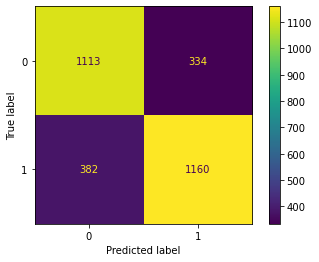

In [1449]:
#lets make a graph of the confusion matrix with sklearn
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LogReg, x_test, y_test)


In [1450]:
#calculate the f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)


0.764163372859025

## Multi class classification

In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score

Like for the binary section, we will make a copy of the df dataset called df_multi

In [238]:
#Make a copy of df dataset called df_multi
df_multi = df.copy()

In [239]:
#define a low, medium and high price threshold based on quntiles
low_price_threshold = df_multi['price'].quantile(0.33)
medium_price_threshold = df_multi['price'].quantile(0.66)

#create a new column called price_category and set it to low, medium or high based on the price threshold
df_multi['price_category'] = np.where(df_multi['price'] < low_price_threshold, 'low', np.where(df_multi['price'] < medium_price_threshold, 'medium', 'high'))
df_multi['price_category'].value_counts()   #count observations in each part

high      3123
low       2959
medium    2885
Name: price_category, dtype: int64

In [240]:
df_multi = pd.get_dummies(df_multi, columns=['host_response_time', 'host_is_superhost', 'host_neighbourhood',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'has_availability', 'instant_bookable'])

In [241]:
#create the training and testing sets
split = int(len(df_multi)*2/3)  #split data into 2/3 and 1/3 of the total data
train = df_multi[:split]       #assign 2/3 to training
test = df_multi[split:]        #assign 1/3 to testing

In [242]:
#make a list with all columns in train except low_price and price
base_list = list(train.columns)
base_list.remove('price_category')
base_list.remove('price')

x_train = train[base_list]
x_test = test[base_list]

y_train = train['price_category']
y_test = test['price_category']

In [243]:
#fill nan values with mean
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

In [1462]:
clt = DecisionTreeClassifier(max_depth=15, min_samples_leaf= 80, min_samples_split = 2, min_weight_fraction_leaf=0)  #create decision tree classifier object
clt.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=15, min_samples_leaf=80,
                       min_weight_fraction_leaf=0)

In [1459]:
#create parameters grid, in this case we will select 6 values per parameter
param_grid = {
              "max_depth": [1, 3, 5, 10, 15, 30],   #max depth of the tree
              "min_samples_split": [2, 5, 10, 20, 30, 40],    #min number of samples required to split an internal node
              "min_samples_leaf": [1, 10, 20, 40, 60, 80],    #min number of samples required to be at a leaf node
              "min_weight_fraction_leaf": [0, 0.1, 0.2, 0.3, 0.4, 0.5]}   #min weighted fraction of the sum total of weights at leaf node
#create grid-search object with default 5-fold cross-validation(cv)
grid = GridSearchCV(estimator=clt, param_grid=param_grid, cv=5)  
grid_result = grid.fit(x_train, y_train)  #fit the model

In [1463]:
#mean cv score of the best estimator, and parameter setting that gave the best results  
print("Best score is: %f with %s" % (grid_result.best_score_, grid_result.best_params_))

Best score is: 0.604384 with {'max_depth': 15, 'min_samples_leaf': 80, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}


In [1467]:
y_pred_tree = clt.predict(x_test)

In [1468]:
print("Accuracy is %f" % accuracy_score(y_test,y_pred_tree))
print("F1-score is %f" % f1_score(y_test,y_pred_tree,average='weighted'))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_tree))

Accuracy is 0.589495
F1-score is 0.588009
Confusion matrix:
[[636  86 256]
 [ 78 674 252]
 [247 308 452]]


/Users/bjarkisverrisson/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


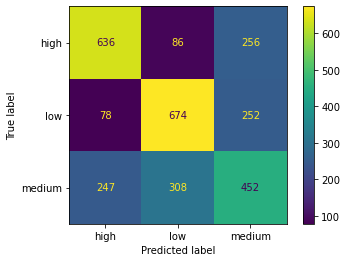

In [1469]:
plot_confusion_matrix(clt, x_test, y_test)  
plt.show()

In [1470]:
print('high:',636/(636+86+256))
print('low:',674/(78+674+252))
print('medium:',452/(247+308+452))

high: 0.6503067484662577
low: 0.6713147410358565
medium: 0.44885799404170806


In [1477]:
cltf = RandomForestClassifier(max_depth=10, random_state=500, min_samples_split=10, min_samples_leaf=1, min_weight_fraction_leaf=0)  #create random forest classifier object
cltf.fit(x_train,y_train)    #train the model

RandomForestClassifier(max_depth=10, min_samples_split=10,
                       min_weight_fraction_leaf=0, random_state=500)

In [1473]:
#create parameters grid, in this case we will select 3,4 values per parameter
param_grid = {
              "max_depth": [1, 3, 5, 10],    #max depth of the tree
              "random_state": [250, 500, 750, 1000],    #ensure that results that can be reproduced
              "min_samples_split": [2, 5, 10, 20],     #min number of samples required to split an internal node
              "min_samples_leaf": [1, 10, 20],         #min number of samples required to be at a leaf node
              "min_weight_fraction_leaf": [0, 0.1, 0.2]}   #min weighted fraction of the sum total of weights at leaf node
#create grid-search object with default 5-fold cross-validation(cv)
grid = GridSearchCV(estimator=cltf, param_grid=param_grid, cv=5)
grid_result = grid.fit(x_train, y_train)    #fit the model

In [1478]:
# summarize results
print("Best score is: %f with %s" % (grid_result.best_score_, grid_result.best_params_))

Best score is: 0.642356 with {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0, 'random_state': 500}


In [1479]:
y_pred_forest = cltf.predict(x_test)  #make predictions from the random forest model

In [1480]:
print("Accuracy is %f" % accuracy_score(y_test,y_pred_forest))
print("F1-score is %f" % f1_score(y_test,y_pred_forest, average='weighted'))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_forest))

Accuracy is 0.621613
F1-score is 0.619878
Confusion matrix:
[[730  33 215]
 [101 643 260]
 [309 213 485]]


/Users/bjarkisverrisson/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


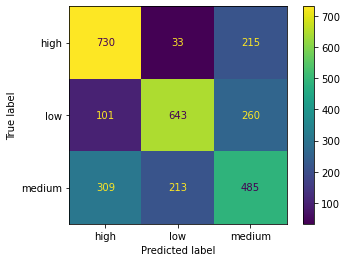

In [1481]:
plot_confusion_matrix(cltf, x_test, y_test)  
plt.show()

In [1482]:
print('high:',730/(730+33+215))
print('low:',643/(101+643+260))
print('medium:',309/(309+213+485))

high: 0.7464212678936605
low: 0.6404382470119522
medium: 0.30685203574975173


## 3.5 Neural networks 

Now we'll attempt to perform better classification of our target variables and get a better multiclass score by applying neural networks to extended Cph Airbnb. The architectural design of hidden layers will be created according to the combination with other parameters, that will give us the most optimal prediction results for the model. Such a combination will be obtained using 2-layer Cross-Validation. It will be done using MLP classifier from sklearn, so we can start with its import. 

In [244]:
from sklearn.neural_network import MLPClassifier

MLP Classifier by default splits the training set in a way that 10% of the training set is used as a validation set, and we decided to go with it.

Once again we have optimized the parameter values, so we can manualy input the recommended parameter values into our model and create a classifier object.

In [253]:
# Specify the model, and create the classifier object
mlp=MLPClassifier(max_iter=500,hidden_layer_sizes=(100,), random_state=2,alpha=0 , activation='relu')
mlp.fit(x_train, y_train)   #fit the neural network

MLPClassifier(alpha=0, max_iter=500, random_state=2)

The neural network classifier will now be implemented. It is computationally more expensive, so we should restrict the maximum number of iterations, but we should still supply the grid search with the number of iterations high enough, for which value it will converge.

In [251]:
param_grid = {
              "max_iter": [500, 750, 1000],   #maximum number of iterations
              "hidden_layer_sizes": [(100,), (120,), (150,)],   #number of neurons across the hidden layers
              "random_state": [2, 5, 10, 20],   ##ensure that results that can be reproduced
              "alpha": [0, 0.1, 0.01, 0.001]}   #strength of the L2 regularization term
#create grid-search object with default 5-fold cross-validation(cv)
grid = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5)
grid_result = grid.fit(x_train, y_train)     #fit the model

In [252]:
print("Best score is: %f with %s" % (grid_result.best_score_, grid_result.best_params_))

Best score is: 0.600366 with {'alpha': 0, 'hidden_layer_sizes': (100,), 'max_iter': 500, 'random_state': 2}


Now that our model is trained, we can obtain the predictions of the model using the test set.

In [254]:
#make predictions from the neural network model
y_pred2_nn = mlp.predict(x_test)

In [255]:
#evaluate quality of predictions for the neural network model
print("Accuracy is %f" % accuracy_score(y_test,y_pred2_nn))
print("F1-score is %f" % f1_score(y_test,y_pred2_nn, average='weighted'))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred2_nn))

Accuracy is 0.580127
F1-score is 0.578768
Confusion matrix:
[[650  70 258]
 [107 639 258]
 [304 258 445]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


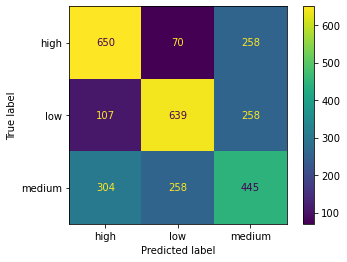

In [256]:
plot_confusion_matrix(mlp, x_test, y_test)  
plt.show()

In [257]:
print('high:',650/(650+70+258))
print('low:',639/(107+639+258))
print('medium:',445/(304+258+445))

high: 0.6646216768916156
low: 0.6364541832669323
medium: 0.44190665342601787


The neural network model has a better performance than decision tree, and random forest for this dataset, with score of 58%. However, it is unbalanced, correctly predicted only 44% of observations in the medium price class. 

WORD COUNT...

Reference: https://stackoverflow.com/questions/71194571/word-count-of-markdown-cells-in-jupyter-notebook

In [1]:
import json
with open('Merge evening 30-11.ipynb', encoding='utf-8') as json_file:
    data = json.load(json_file)
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] 
            wordCount = wordCount + len(temp)
            
print(wordCount)    

3517
